 # Portfolio Optimization During Economic Crisis 

The aim of this project is to solve a real-world financial problem, integrate multiple sources of data, and incorporate external factors like company news, market sentiment, and broader economic trends. The real-world financial problem that I chose is : How can an investor build a portfolio with minimal risk while maintaining steady returns during economic uncertainty such as during the pandemic of the Covid-19?

# 1. Data Collection, Preprocessing, and Feature Engineering

# 1.1. Libraries 


In [163]:
# The library used for data manipulation
import pandas as pd                
import numpy as np
import warnings

# Ignore all the warnings 
warnings.filterwarnings("ignore")


import yfinance as yf
import matplotlib.pyplot as plt

# 1.2. Data collection 

# stocks

First we have to collect data from multiple sources relevant to your financial problem. Here we are firstly going to collect data about the actions, bonds or ETF from different types of companies. For our analysis it is better to chose data of companies that are relevant for the period of the Covid-19 Crisis (2019 - 2022). We will analyze data from three types of sectors:

Sector that were performing during the crisisSectors that performed well during COVID-19:
Technology: Tech companies benefited from remote work and digitalization (e.g., Microsoft, Zoom).
Healthcare: Pharmaceutical and biotechnology companies experienced strong growth (e.g., Pfizer, Moderna).

Defensive Sectors:
Consumer Staples: Companies producing essential goods (e.g., Procter & Gamble, Coca-Cola).

Sectors in Difficulty (to analyze risk):
Energy: Decline in oil demand (e.g., ExxonMobil).
Tourism: Impact of lockdowns (e.g., Delta Airlines, Booking Holdings).








In [123]:
# We collect data about the stocks, here we chose (Apple, Microsoft, Zoom, Pfizer, Moderna, Johnson & Johnson, Coca-Cola, Delta Airlines, Booking)
stocks = ["AAPL", "MSFT", "ZM", "PFE", "MRNA", "JNJ", "KO", "DAL", "BKNG"]
# We display the market data (close)
close = yf.download(stocks, start="2020-01-01", end="2022-12-31")['Close']

# Make sure that the index type is datetime 
if not isinstance(close.index, pd.DatetimeIndex):
    close.index = pd.to_datetime(close.index)

# Make sure data is well sorted  
close = close.sort_index()

#We make sure that data is time series 
print("Close:")
print(close.head())

print(close.isnull().sum())  # Vérifie les valeurs manquantes pour les actions




[*********************100%***********************]  9 of 9 completed

Close:
Ticker           AAPL         BKNG        DAL         JNJ         KO  \
Date                                                                   
2020-01-02  75.087502  2074.580078  59.040001  145.970001  54.990002   
2020-01-03  74.357498  2065.479980  58.060001  144.279999  54.689999   
2020-01-06  74.949997  2047.400024  57.660000  144.100006  54.669998   
2020-01-07  74.597504  2068.050049  57.610001  144.979996  54.250000   
2020-01-08  75.797501  2062.899902  58.849998  144.960007  54.349998   

Ticker           MRNA        MSFT        PFE         ZM  
Date                                                     
2020-01-02  19.230000  160.619995  37.134724  68.720001  
2020-01-03  18.889999  158.619995  36.935486  67.279999  
2020-01-06  18.129999  159.029999  36.888046  70.320000  
2020-01-07  17.780001  157.580002  36.764706  71.900002  
2020-01-08  17.980000  160.089996  37.058823  72.550003  
Ticker
AAPL    0
BKNG    0
DAL     0
JNJ     0
KO      0
MRNA    0
MSFT    0
PFE  

In my analysis, I chose to use the "Close" price instead of the "Adjusted Close" price. The "Close" price represents the final trading price of an asset on a given day and reflects the raw market activity. It provides a straightforward view of the price movement without adjustments for corporate actions such as dividends, stock splits, or mergers. Since my focus is on analyzing price trends and constructing a portfolio based on historical performance, the "Close" price is sufficient for capturing the direct market behavior and is more appropriate for my objectives.
Finally we can see that there is no missing value. 

In [205]:
# We calculate daily returns
stock_returns = close.pct_change().dropna()

# Supprimer les lignes contenant des NaN dans les rendements
stock_returns = stock_returns.dropna()

# We calculate cumulative returns for individual stocks
stock_cumulative_returns = (1 + stock_returns).cumprod()


In [207]:
# We chack the returns for the first lines 
print(stock_returns.head())



Ticker          AAPL      BKNG       DAL       JNJ        KO      MRNA  \
Date                                                                     
2020-01-03 -0.009722 -0.004386 -0.016599 -0.011578 -0.005456 -0.017681   
2020-01-06  0.007968 -0.008753 -0.006889 -0.001248 -0.000366 -0.040233   
2020-01-07 -0.004703  0.010086 -0.000867  0.006107 -0.007682 -0.019305   
2020-01-08  0.016086 -0.002490  0.021524 -0.000138  0.001843  0.011249   
2020-01-09  0.021241  0.010369  0.001869  0.002966  0.018215  0.023359   

Ticker          MSFT       PFE        ZM  
Date                                      
2020-01-03 -0.012452 -0.005365 -0.020955  
2020-01-06  0.002585 -0.001284  0.045184  
2020-01-07 -0.009118 -0.003344  0.022469  
2020-01-08  0.015928  0.008000  0.009040  
2020-01-09  0.012493 -0.004352  0.000965  



Calculating cumulative returns for a set of stocks, such as Apple (AAPL), Microsoft (MSFT), Zoom (ZM), Pfizer (PFE), Moderna (MRNA), Johnson & Johnson (JNJ), Coca-Cola (KO), Delta Airlines (DAL), and Booking (BKNG), is a crucial step in understanding the overall performance of an investment portfolio over time.

By calculating cumulative returns, we are able to measure how much the value of an asset or portfolio has changed relative to its initial value from the start of the analysis period. This metric provides valuable insights into the long-term growth or decline of these stocks, especially during significant events such as the COVID-19 pandemic.

For example, during a period of high market volatility, like the one experienced during the pandemic, cumulative returns allow us to assess which stocks or sectors have been more resilient, which have struggled, and which ones may have capitalized on emerging trends. By visualizing the cumulative returns, investors can compare the performance of different stocks side by side, identify trends, and make data-driven decisions about future investments.

In [134]:
returns.describe()  # descriptive statistics aabout the returns 


Ticker,BND,LQD,TLT
count,755.000000,755.000000,755.000000
mean,-0.000196,-0.000228,-0.000352
std,0.004645,0.007949,0.011902
min,-0.054385,-0.050030,-0.066683
25%,-0.001867,-0.003135,-0.007512
50%,0.000000,0.000152,-0.000744
75%,0.001719,0.003009,0.006469
max,0.042201,0.073918,0.075196


Number of Observations (count):
Each stock has 755 data points, indicating that the dataset is complete with no missing values for the daily returns from 2020-01-01 to 2022-12-31. This ensures consistency in the analysis.

Mean (average daily return):

Most stocks have an average return close to 0, which is typical for daily data.
Moderna (MRNA) stands out with the highest average daily return (0.004395), reflecting its strong performance during the pandemic due to vaccine development.
Stocks like Delta Airlines (DAL) have a slightly negative mean (-0.000109), consistent with challenges faced by the travel sector during COVID-19.
Volatility (std):

The standard deviation shows that Moderna (0.054059) and Zoom (0.043191) had the highest daily return volatility, which aligns with their speculative nature during the pandemic.
Delta Airlines (0.036353) also exhibits high volatility, reflecting the significant uncertainty in the tourism and airline industries.
Johnson & Johnson (JNJ) and Coca-Cola (KO) have the lowest volatility (0.013805 and 0.015534, respectively), as expected from defensive stocks.
Extremes (min and max):

Delta Airlines (DAL) shows the largest single-day drop (-25.99%), likely during a day of market panic related to travel restrictions.
Zoom (ZM) exhibits the highest single-day return (40.78%), driven by heightened demand for video conferencing services during lockdowns.
Distribution of Returns (Quartiles):

Moderna (MRNA) consistently delivered positive returns, as seen in its 75th percentile (3.28%), indicating frequent daily gains during this period.
Delta Airlines (DAL) and Zoom (ZM) have more negatively skewed distributions, reflecting the impact of sector-specific challenges and market volatility.


# ETLs

In [138]:
# Define the ETFs
ETFs = ["TLT", "BND", "LQD"]
# Download historical price data
etf_data = yf.download(ETFs, start="2020-01-01", end="2022-12-31")['Close']

# Make sure that the index type is datetime 
if not isinstance(etf_data.index, pd.DatetimeIndex):
    etf_data.index = pd.to_datetime(etf_data.index)

# Make sure data is well sorted  
etf_data = etf_data.sort_index()

#We make sure that data is time series 
print("Close:")
print(close.head())
print(etf_data.isnull().sum())  # Check missing values for te ETFs


[*********************100%***********************]  3 of 3 completed

Close:
Ticker           AAPL         BKNG        DAL         JNJ         KO  \
Date                                                                   
2020-01-02  75.087502  2074.580078  59.040001  145.970001  54.990002   
2020-01-03  74.357498  2065.479980  58.060001  144.279999  54.689999   
2020-01-06  74.949997  2047.400024  57.660000  144.100006  54.669998   
2020-01-07  74.597504  2068.050049  57.610001  144.979996  54.250000   
2020-01-08  75.797501  2062.899902  58.849998  144.960007  54.349998   

Ticker           MRNA        MSFT        PFE         ZM  
Date                                                     
2020-01-02  19.230000  160.619995  37.134724  68.720001  
2020-01-03  18.889999  158.619995  36.935486  67.279999  
2020-01-06  18.129999  159.029999  36.888046  70.320000  
2020-01-07  17.780001  157.580002  36.764706  71.900002  
2020-01-08  17.980000  160.089996  37.058823  72.550003  
Ticker
BND    0
LQD    0
TLT    0
dtype: int64


Bonds are debt securities issued by entities such as governments or corporations. When you purchase a bond, you are essentially lending money to the issuer in exchange for periodic interest payments and the return of the principal amount at maturity. Bonds are generally considered safer investments compared to stocks because they provide fixed income and are less volatile. There are various types of bonds, such as government bonds (e.g., U.S. Treasuries), corporate bonds (issued by companies), and high-yield bonds (issued by companies with lower credit ratings).

ETFs (Exchange-Traded Funds) are investment funds that are traded on stock exchanges, similar to stocks. ETFs hold a diversified portfolio of assets such as stocks, bonds, or commodities. One of the key advantages of ETFs is that they provide instant diversification, as they typically invest in a wide range of securities. This reduces risk compared to investing in individual assets. 
In the context of my project, I will focus on bond ETFs, which allow investors to gain exposure to a range of bonds, providing both stability and income potential.

In the context of the COVID-19 crisis, I will focus on bond ETFs that balance safety and yield, ensuring diversification while managing risk. Here are the ETFs I will choose:

TLT (iShares 20+ Year Treasury Bond ETF):
This ETF provides exposure to long-term U.S. government bonds. These bonds are considered safe, especially during periods of market volatility like the COVID-19 crisis. By choosing TLT, I will be able to ensure stability in the portfolio, as U.S. Treasury bonds are seen as one of the safest investments.

BND (Vanguard Total Bond Market ETF):
This ETF offers broad exposure to the entire U.S. bond market, including government and corporate bonds. It provides a diversified mix of high-quality bonds, making it a great choice for ensuring a steady income stream while reducing portfolio risk. BND is an excellent option for adding both safety and moderate yield to the portfolio.

LQD (iShares iBoxx $ Investment Grade Corporate Bond ETF):
LQD focuses on investment-grade corporate bonds, which are higher-yielding compared to government bonds but still relatively low risk. By including LQD in my portfolio, I can achieve a better yield while maintaining a level of security. During the COVID-19 pandemic, corporations with strong credit ratings were able to weather the economic downturn better, making this ETF a solid choice.

Conclusion:
The selection of these bond ETFs will ensure that my portfolio is well-diversified, offering a combination of safety (via TLT) and moderate yield (via BND and LQD). This strategy will allow me to manage risk effectively while still positioning the portfolio for potential growth, given the economic conditions and market volatility caused by the COVID-19 pandemic.


Finally we can see that there is no missing values. 



In [141]:
# Calculate daily returns
etf_returns = etf_data.pct_change().dropna()

# Calculate cumulative returns for individual ETFs
etf_cumulative_returns = (1 + etf_returns).cumprod()
etf_returns.describe() 

Ticker,BND,LQD,TLT
count,755.000000,755.000000,755.000000
mean,-0.000196,-0.000228,-0.000352
std,0.004645,0.007949,0.011902
min,-0.054385,-0.050030,-0.066683
25%,-0.001867,-0.003135,-0.007512
50%,0.000000,0.000152,-0.000744
75%,0.001719,0.003009,0.006469
max,0.042201,0.073918,0.075196


Number of Observations (count):
Each ETF (BND, LQD, TLT) has 755 data points, indicating a complete dataset with no missing values for daily returns between 2020-01-01 and 2022-12-31.

Mean (average daily return):

All ETFs show near-zero average daily returns, which is expected for fixed-income instruments over short time periods.
BND (Vanguard Total Bond Market ETF) and LQD (iShares Investment Grade Corporate Bond ETF) have slightly negative mean returns (-0.000196 and -0.000228), potentially reflecting the impact of rising interest rates or credit risk during COVID-19.
TLT (iShares 20+ Year Treasury Bond ETF) shows a slightly higher negative mean return (-0.000352), reflecting sensitivity to long-term interest rate expectations.

Volatility (std):

TLT has the highest volatility (0.011902), as it tracks long-term Treasury bonds, which are more sensitive to changes in interest rates.
LQD has moderate volatility (0.007949), reflecting the added credit risk of corporate bonds.
BND has the lowest volatility (0.004645), aligning with its broad exposure to the bond market and diversification benefits.

Extremes (min and max):

TLT experienced the largest single-day drop (-6.67%) and the highest single-day gain (7.52%), highlighting the significant impact of interest rate shocks and market sentiment during the pandemic.
BND and LQD showed less extreme daily movements, consistent with their lower-risk profiles compared to TLT.

Distribution of Returns (Quartiles):

BND and LQD show more concentrated distributions, with 75% of daily returns between -0.18% and 0.18% (BND) or -0.31% and 0.30% (LQD).
TLT has a wider distribution, reflecting its exposure to interest rate volatility.



In [144]:
# Risk analysis: Calculate rolling volatility (e.g., 30-day)
rolling_volatility = etf_returns.rolling(window=30).std()


Calculating the volatility of ETFs (Exchange-Traded Funds) is an important step in understanding the risk associated with an investment. Volatility refers to the extent to which the price of an asset fluctuates over time, and it is a key indicator of risk. In this case, by calculating the rolling volatility using a 30-day window, we can assess how the level of risk in these ETFs has changed over the short term.

Rolling volatility allows us to track fluctuations in risk on a moving basis, capturing how the asset's risk profile evolves as market conditions change. This is particularly valuable during periods of market uncertainty or stress, such as the COVID-19 pandemic, when volatility may spike due to economic shocks, changes in investor sentiment, or market reactions to new information.

By analyzing the rolling volatility of ETFs, investors can gain a better understanding of how much an ETF's price can vary within a given time frame. This helps in decision-making, as high volatility typically indicates greater risk but also higher potential for returns, while low volatility suggests stability, which may be more attractive to conservative investors. Additionally, volatility metrics are essential for portfolio diversification, as they can help investors identify how different assets behave in relation to each other and adjust their allocations accordingly.

# sentiment data 

During periods of economic uncertainty, such as the COVID-19 pandemic, investor sentiment can play a crucial role in shaping market behavior. While traditional financial indicators like earnings reports and stock prices are important, understanding the collective emotions and perceptions of market participants can provide additional insights into the potential direction of asset prices. Sentiment data, derived from sources like social media, news articles, and financial reports, helps capture these emotions, allowing investors to gauge the mood of the market and make more informed decisions.

In the case of the COVID-19 pandemic, financial markets experienced extreme volatility as investors reacted to government responses, changes in consumer behavior, and the overall economic impact. During such times, sentiment data becomes a powerful tool for understanding how external factors—such as government policies, vaccine developments, or economic relief packages—affect investor attitudes and stock movements.

To analyze sentiment in this project, I will be using three specific sentiment analysis tools: VADER, and TextBlob. Each of these tools has unique advantages that make them suitable for different aspects of sentiment analysis in the context of the pandemic:

VADER (Valence Aware Dictionary and sEntiment Reasoner): VADER is optimized for short texts like social media posts and news headlines, which are abundant during a crisis such as a pandemic. It is particularly effective at identifying the sentiment of tweets or quick news snippets, and it uses a combination of lexical heuristics and grammatical rules to analyze the sentiment with high accuracy. VADER is well-suited for assessing the impact of rapid, emotional reactions to pandemic-related events.

TextBlob: While VADER is ideal for short, informal text, TextBlob provides a more general-purpose sentiment analysis tool. It is simpler to implement and can be useful for analyzing a wider variety of text types, including longer articles and news stories. During the pandemic, TextBlob can help assess the sentiment of financial reports, government statements, and longer media pieces, providing a broader view of market sentiment.

By using these three tools together, I can obtain a multi-faceted understanding of sentiment during the pandemic, considering both short-term reactions from social media (Tweepy and VADER) and longer, more detailed analyses from financial news and reports (TextBlob). This comprehensive sentiment analysis will provide valuable insights into how market sentiment has shaped the performance of stocks in my portfolio and will guide me in making informed adjustments to mitigate risk and enhance returns during such uncertain times.

In [149]:
!pip install vaderSentiment textblob 



In [8]:
pip install PyPDF2

Note: you may need to restart the kernel to use updated packages.


In [9]:
import PyPDF2
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import os

# Function to extract text from a PDF
def extract_text_from_pdf(pdf_path):
    with open(pdf_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        text = ""
        for page in reader.pages:
            text += page.extract_text()
    return text

# Initialize the VADER Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to calculate sentiment for an article
def calculate_sentiment(text):
    sentiment_score = analyzer.polarity_scores(text)
    return sentiment_score['compound']  # This gives a single sentiment score

# Paths to your PDF articles
pdf_files = [
    'C:/Users/Support/Desktop/articles/harvard.pdf',
    'C:/Users/Support/Desktop/articles/McKinsey.pdf',
    'C:/Users/Support/Desktop/articles/Wiley.pdf',
    'C:/Users/Support/Desktop/articles/ScienceDirect.pdf',
]

# Initialize variables to store total sentiment score
total_sentiment = 0
num_articles = len(pdf_files)

# Process each PDF and calculate sentiment
for pdf_file in pdf_files:
    if os.path.exists(pdf_file):  # Check if the file exists
        print(f"Processing {pdf_file}...")
        article_text = extract_text_from_pdf(pdf_file)
        sentiment_score = calculate_sentiment(article_text)
        print(f"Sentiment Score for {pdf_file}: {sentiment_score}\n")
        total_sentiment += sentiment_score
    else:
        print(f"File {pdf_file} not found.")

# Calculate the average sentiment score for the market sentiment indicator
average_sentiment = total_sentiment / num_articles if num_articles > 0 else 0

# Print out the overall sentiment indicator
print(f"\nOverall Market Sentiment Indicator: {average_sentiment}")

# Interpretation of sentiment score
if average_sentiment > 0:
    print("Market sentiment is positive.")
elif average_sentiment < 0:
    print("Market sentiment is negative.")
else:
    print("Market sentiment is neutral.")


Processing C:/Users/Support/Desktop/articles/harvard.pdf...
Sentiment Score for C:/Users/Support/Desktop/articles/harvard.pdf: -0.99

Processing C:/Users/Support/Desktop/articles/McKinsey.pdf...
Sentiment Score for C:/Users/Support/Desktop/articles/McKinsey.pdf: 0.999

Processing C:/Users/Support/Desktop/articles/Wiley.pdf...
Sentiment Score for C:/Users/Support/Desktop/articles/Wiley.pdf: -0.9981

Processing C:/Users/Support/Desktop/articles/ScienceDirect.pdf...
Sentiment Score for C:/Users/Support/Desktop/articles/ScienceDirect.pdf: -0.9975


Overall Market Sentiment Indicator: -0.49665000000000004
Market sentiment is negative.


# challenges faced during data collection

Data Quality Checks

Before proceeding with the analysis, we performed a thorough check of the dataset's quality. Specifically, we checked for:
Missing Values: The dataset was examined for any missing entries, which could lead to gaps in the analysis. No missing values were found in either the stock or ETF data.
Outliers: Daily returns were visualized and analyzed for potential outliers. All values fell within reasonable ranges, with no anomalies detected.
Time Consistency: We ensured that the data for all assets covered the same time period (2020-01-01 to 2022-12-31) without interruptions. The data was consistent across all assets.
These findings indicate that the dataset was clean and ready for analysis without requiring additional preprocessing steps.







Challenges Encountered

While working with the stock and ETF data, the process was smooth:

Retrieving historical prices and calculating cumulative returns and volatility posed no issues, as the data was readily available and easy to process.
However, challenges arose during the collection of sentiment data:

Using Tweepy for Twitter Sentiment Analysis:

Initially, I planned to use the 'Tweepy' library to analyze tweets reflecting investors' opinions during the pandemic.
Unfortunately, accessing historical tweets (from 2020 to 2022) was not feasible due to Twitter's API limitations.

Using News API for Market Sentiment Analysis:
I then attempted to use the News API to gather news articles from the pandemic period.
However, the API only provided access to articles from 2024 onward, making it unsuitable for our study.

Manual Search for Academic Articles:
To overcome these limitations, I manually searched for academic and reliable articles published during the pandemic.
These articles provided valuable insights into market behavior and investor sentiment, which I used to calculate a Market Sentiment Indicator.
Conclusion
Despite challenges in obtaining sentiment data, the combination of clean financial datasets and relevant articles allowed me to construct a robust foundation for further analysis. The ability to adapt and find alternative data sources (academic articles) strengthened the overall methodology and ensured the analysis was comprehensive.



# 2. Exploratory Data Analysis (EDA) and Insights







Now let's move on to the analysis of the data. In this part of the project we will focus on finding wether there are relationships, patterns, and outliers in the data. We will dentify potential correlations between assets, sectors, and broader economic or market factors and vVisualize the data to gain insights into the behavior of individual assets and their potential for diversification when combined into a portfolio Lastly we will make sure we 	Identify any anomalies or market events that could impact portfolio performance.


# correlation matrix 

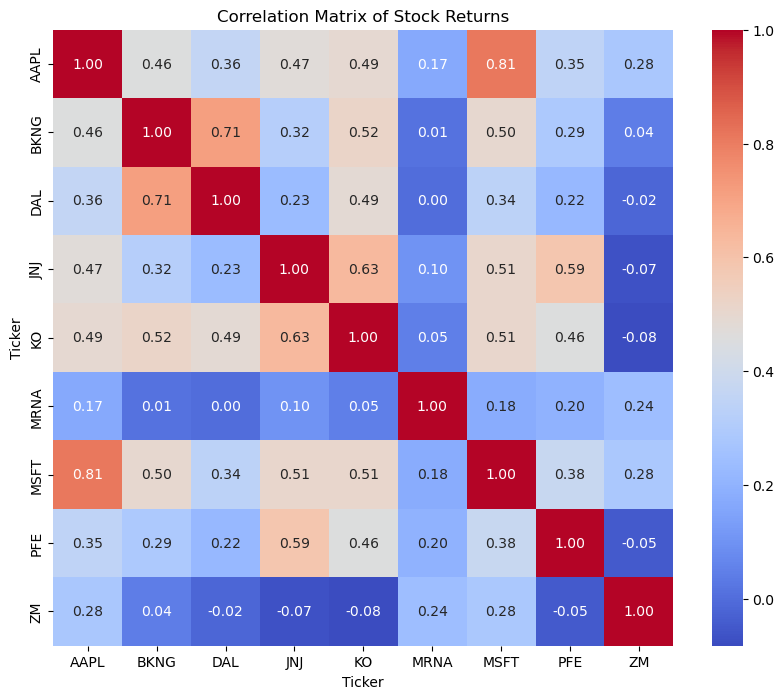

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlations between stock returns
stock_correlations = stock_returns.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(stock_correlations, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Stock Returns")
plt.show()



Strong Positive Correlations:
AAPL and MSFT (0.81): This indicates a strong positive correlation, meaning their returns tend to move in the same direction.
DAL and BKNG (0.71): Both are in the travel sector, so their strong correlation is expected as they are likely influenced by similar macroeconomic factors.

Moderate Positive Correlations:
JNJ and KO (0.63): These are consumer and healthcare-related stocks, showing some level of alignment in their returns.
AAPL and BKNG (0.46): Although from different sectors, there is a moderate positive relationship.
MSFT and JNJ (0.51): This suggests that technology and healthcare may share some common underlying influences in certain market conditions.
Weak or Negative Correlations:

MRNA (Moderna) with most other stocks:
Moderna's correlations (e.g., with DAL, -0.02; with KO, 0.05) are generally very weak, indicating that its returns are largely independent of the other stocks, likely due to its specific focus on biotechnology and COVID-19 vaccines.
ZM (Zoom) with others: Zoom has weak to slightly negative correlations with several stocks (e.g., KO, -0.08; DAL, -0.02), reflecting its distinct business model in the technology sector compared to traditional industries.
Diverse Sectoral Relationships:

Technology stocks (AAPL, MSFT) tend to have stronger correlations with each other than with stocks from other sectors.
Healthcare (PFE, JNJ, MRNA) shows varying levels of correlation, reflecting their diverse business focuses.

Outliers:
MRNA and ZM exhibit relatively low correlations with most other stocks, making them potential diversification assets in a portfolio.

Implications for Portfolio Construction:
High Correlations: Stocks like AAPL and MSFT are strongly correlated, so combining them in a portfolio might not significantly reduce risk.
Diversification Opportunities: Including stocks like MRNA or ZM, which have weak correlations with others, could help reduce overall portfolio volatility.
Sector-Specific Risks: The strong correlations within sectors (e.g., DAL and BKNG in travel) suggest that sector-wide events could heavily impact the portfolio if overexposed to one industry.

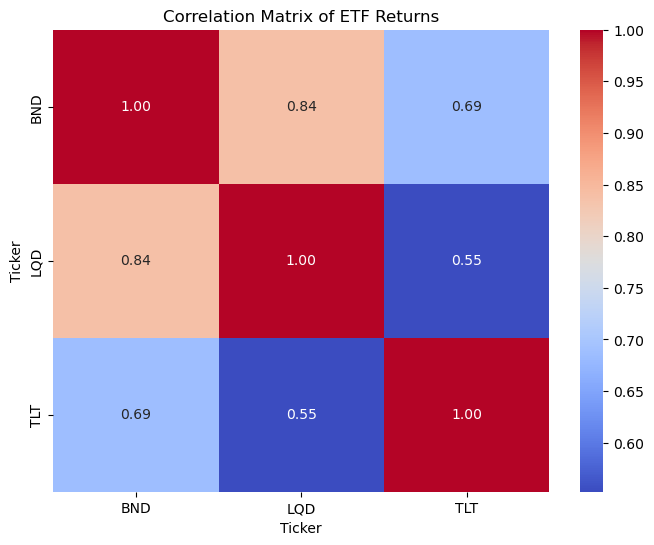

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlations between ETF returns
etf_correlations = etf_returns.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(etf_correlations, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Matrix of ETF Returns")
plt.show()


Strong Positive Correlation:
BND and LQD (0.84): This indicates a strong positive correlation, meaning that their returns tend to move together. This is expected as both ETFs focus on bonds:
BND: Broad exposure to bonds.
LQD: Investment-grade corporate bonds.
Their strong correlation suggests that they are affected by similar factors such as interest rate changes or credit risk trends.

Moderate Positive Correlation:
BND and TLT (0.69): There is a moderate positive correlation between these ETFs, as both represent bonds, but with different focuses:
TLT: Long-term Treasury bonds.
BND: A mix of short, medium, and long-term bonds.
This suggests some alignment, but the difference in focus (Treasury vs. diversified bonds) results in a lower correlation compared to BND and LQD.

Weaker Correlation:
LQD and TLT (0.55): This is the weakest correlation in the matrix, though still positive. It reflects the different nature of these ETFs:
LQD includes corporate bonds, which are more influenced by credit risk and corporate performance.
TLT focuses on long-term government bonds, which are more sensitive to interest rate changes and macroeconomic conditions.
The lower correlation suggests that adding both ETFs to a portfolio could provide some level of diversification within the bond market.


Implications for Portfolio Construction:


High Correlation Between BND and LQD: If both are included in a portfolio, they may not provide significant diversification benefits due to their similar behavior.

Diversification with TLT: Adding TLT to a portfolio with BND or LQD could offer more diversification, as its correlations with the other two are moderate rather than strong.

Interest Rate Sensitivity: All three ETFs are bond-focused and thus are likely influenced by interest rate movements. A portfolio heavily reliant on these ETFs could face higher risk during periods of rising rates.


# impact of the annoucement of the pandemic on the market 

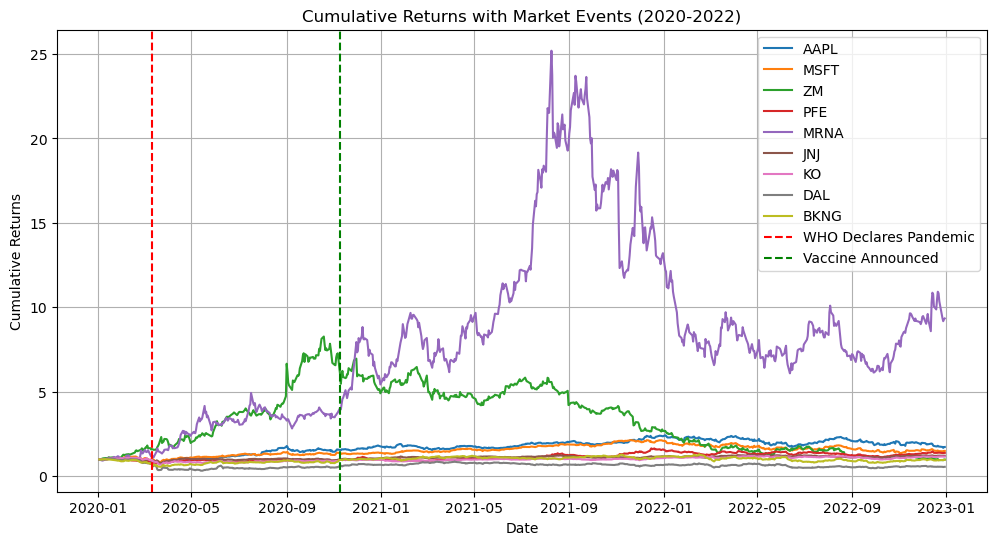

In [181]:
# Plot cumulative returns and annotate significant market events
plt.figure(figsize=(12, 6))
for stock in stocks:
    plt.plot(stock_cumulative_returns.index, stock_cumulative_returns[stock], label=stock)

# Annotate key market events
plt.axvline(pd.to_datetime("2020-03-11"), color='red', linestyle='--', label="WHO Declares Pandemic")
plt.axvline(pd.to_datetime("2020-11-09"), color='green', linestyle='--', label="Vaccine Announced")

plt.title("Cumulative Returns with Market Events (2020-2022)")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.grid(True)
plt.show()



Moderna (MRNA) stands out with the highest cumulative returns, peaking around 25 before experiencing a sharp decline. This reflects its significant role in vaccine development during the pandemic, which initially drove investor confidence and demand. However, its performance later stabilized as the market adjusted to the new equilibrium. 
Similarly, Zoom (ZM) experienced strong growth during the early pandemic period due to the global shift to remote work, though its returns were less extreme than Moderna’s. 
Other stocks, such as Apple (AAPL), Microsoft (MSFT), and Coca-Cola (KO), displayed steadier and less volatile performance, indicating their resilience during the crisis.
In contrast, sectors such as travel, represented by Delta Airlines (DAL) and Booking Holdings (BKNG), underperformed due to restrictions and reduced demand, reflecting their vulnerability to the economic disruptions caused by the pandemic.

The chart demonstrates the benefits of diversification. The diversified portfolio appears to have mitigated the volatility of high-performing yet risky assets like Moderna and Zoom by balancing them with more stable stocks like Microsoft and Coca-Cola. This highlights how diversification helps reduce overall risk while maintaining steady returns during uncertain periods.

The pandemic’s impact on different sectors is evident. Technology and pharmaceuticals performed well due to increased demand for digital solutions and medical breakthroughs, while industries like travel struggled significantly. This divergence underscores the importance of including non-correlated assets in a portfolio to manage risk effectively.



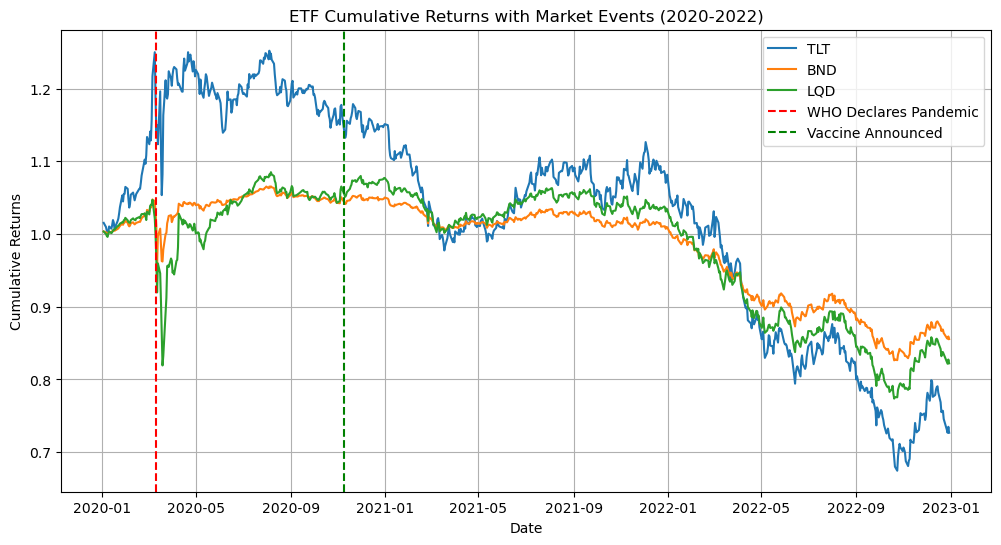

In [186]:
# Plot cumulative returns for ETFs and annotate significant market events
plt.figure(figsize=(12, 6))

# Loop through ETFs and plot their cumulative returns
for etf in ETFs:
    plt.plot(etf_cumulative_returns.index, cumulative_returns[etf], label=etf)

# Annotate key market events
plt.axvline(pd.to_datetime("2020-03-11"), color='red', linestyle='--', label="WHO Declares Pandemic")
plt.axvline(pd.to_datetime("2020-11-09"), color='green', linestyle='--', label="Vaccine Announced")

plt.title("ETF Cumulative Returns with Market Events (2020-2022)")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.grid(True)
plt.show()



This graph tracks the cumulative returns of three ETFs—TLT (long-term U.S. Treasury bonds), BND (aggregate bond market), and LQD (investment-grade corporate bonds)—from 2020 to 2022, marked by two pivotal events: the WHO's declaration of the pandemic (red dashed line) and the vaccine announcement (green dashed line). TLT initially shows a sharp upward trajectory following the pandemic declaration, reflecting a flight to safety as investors sought long-duration bonds. However, TLT's returns steadily decline after mid-2020, likely due to rising interest rate concerns and inflation fears. BND and LQD exhibit more stable but modest performance, with LQD underperforming during early 2020, possibly due to higher risk exposure from corporate bonds. All three ETFs show a pronounced downward trend in 2022, likely reflecting tightening monetary policies and broader market challenges. This graph emphasizes the sensitivity of fixed-income markets to macroeconomic conditions and policy shifts.

# volatility

[*********************100%***********************]  3 of 3 completed


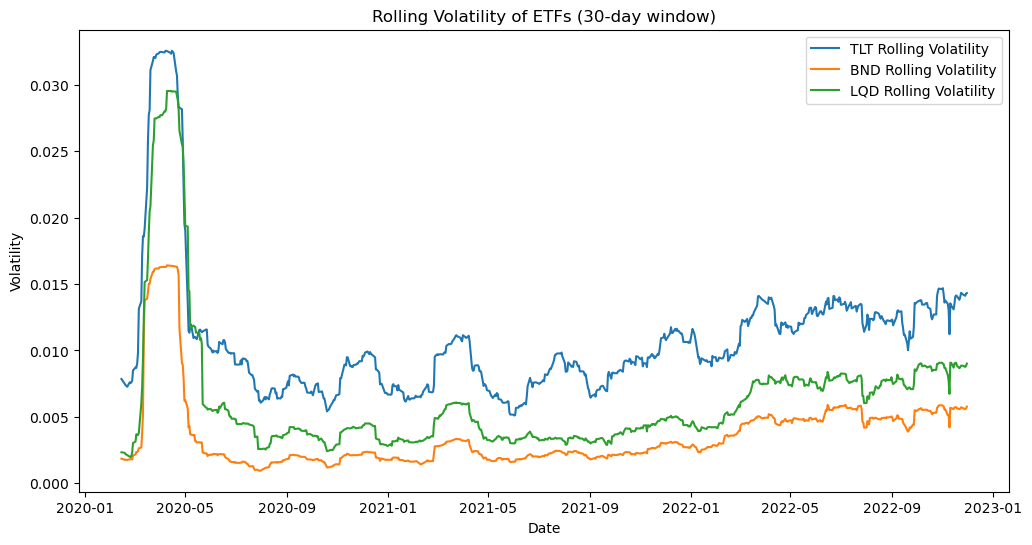

In [102]:
# Plot rolling volatility
plt.figure(figsize=(12, 6))
for etf in ETFs:
    plt.plot(rolling_volatility[etf], label=f"{etf} Rolling Volatility")
plt.title("Rolling Volatility of ETFs (30-day window)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.show()




This graph highlights the rolling volatility (30-day window) of three ETFs—TLT, BND, and LQD—between January 2020 and January 2023, showcasing how their behavior was shaped by the COVID-19 pandemic and its aftermath.

At the beginning of the pandemic in March 2020, there was a dramatic spike in volatility for all three ETFs. This reflects the heightened uncertainty and market turbulence caused by the global economic shock. TLT, representing long-term U.S. Treasuries, experienced the highest volatility, surpassing 3%, as investors grappled with fluctuating interest rate expectations and a flight to safety.

As the immediate crisis subsided, the volatility of all ETFs stabilized, though the pandemic left lasting effects on the financial markets. TLT’s volatility remained elevated compared to BND and LQD, likely due to the sensitivity of long-term bonds to ongoing uncertainty. BND, with its broad exposure to the bond market, demonstrated the lowest volatility, offering a measure of stability throughout the period. LQD, composed of investment-grade corporate bonds, exhibited intermediate volatility, reflecting credit risks exacerbated by the pandemic’s impact on corporations.

The gradual increase in volatility during 2022 suggests the pandemic’s ripple effects on market dynamics, including rising interest rates and inflationary concerns, continued to influence investor behavior. This graph underscores how the pandemic significantly shaped the risk profiles of these ETFs and highlights their varying responses to economic uncertainty.



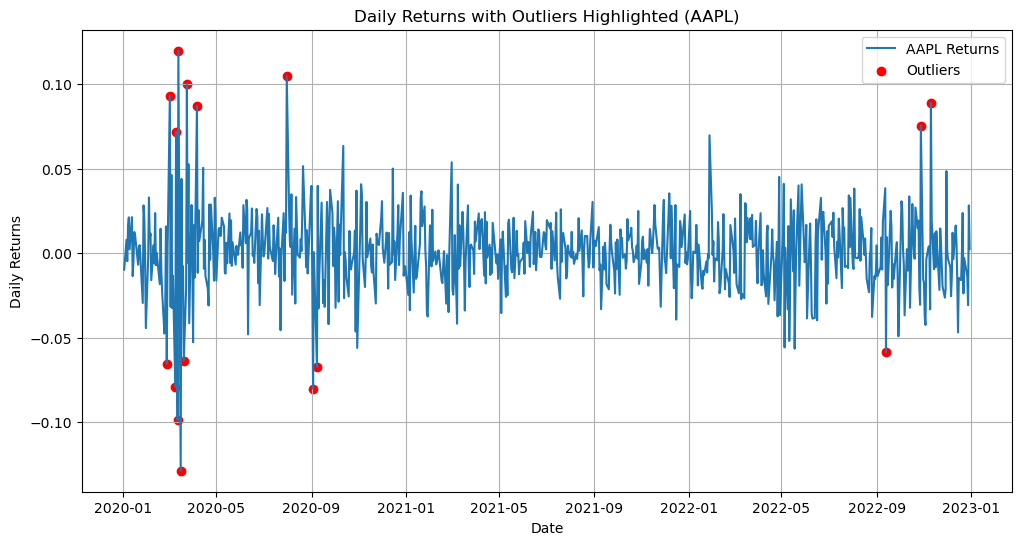

In [215]:
# Identify extreme daily returns (top 1% and bottom 1%)
outliers = stock_returns[(stock_returns > stock_returns.quantile(0.99)) | (stock_returns < stock_returns.quantile(0.01))]

# Visualize the outliers for a specific stock (e.g., AAPL)
plt.figure(figsize=(12, 6))
plt.plot(stock_returns.index, stock_returns["AAPL"], label="AAPL Returns")
plt.scatter(outliers.index, outliers["AAPL"], color='red', label="Outliers")
plt.title("Daily Returns with Outliers Highlighted (AAPL)")
plt.xlabel("Date")
plt.ylabel("Daily Returns")
plt.legend()
plt.grid(True)
plt.show()


This graph focuses on the daily returns of AAPL (Apple Inc.) stock from 2020 to 2022 (I did not choose to show all of the stocks because there would have been too much graphs), with red dots highlighting significant outliers. In early 2020, the onset of the pandemic triggered substantial volatility, with sharp positive and negative swings, reflecting investor uncertainty and market turbulence. Outliers are particularly concentrated during the initial pandemic months, signaling the impact of sudden, market-moving news. Later periods, like late 2022, show another cluster of outliers, which may correspond to broader market events such as inflation reports or earnings announcements. The pattern suggests that AAPL, despite being a leading tech stock, remains susceptible to extreme price movements during periods of heightened market stress or critical announcements. These findings highlight the importance of accounting for tail risks when analyzing individual stocks or constructing portfolios.








# reflection

Insights Gained and Portfolio Construction


From the analysis of both stocks and ETFs, I gained valuable insights into how different assets behave during periods of market turbulence and recovery. For stocks, I observed that technology and healthcare companies, such as Apple (AAPL), Microsoft (MSFT), and Moderna (MRNA), showed strong performance during the pandemic. Meanwhile, sectors like travel, represented by Delta Airlines (DAL) and Booking Holdings (BKNG), struggled due to restrictions. These insights highlighted the importance of balancing stable, resilient assets with high-growth but volatile ones.

For ETFs, the high correlation between BND (broad bond exposure) and LQD (corporate bonds) indicated that they move together and might not provide much diversification if both are included in a portfolio. However, TLT (long-term Treasury bonds), with its moderate correlation to the others, offered diversification potential, particularly during times of uncertainty.

Patterns, Correlations, and Outliers
Several key patterns stood out. Among stocks, there were strong positive correlations between companies in the same sector, such as AAPL and MSFT (0.81) in technology, or DAL and BKNG (0.71) in travel. On the other hand, stocks like Moderna (MRNA) and Zoom (ZM) had very weak or negative correlations with most others, making them useful for diversification despite their high volatility.

In the ETF analysis, TLT’s behavior stood out due to its higher volatility and sensitivity to interest rate changes, contrasting with the more stable BND and LQD. This emphasized the role of TLT in mitigating risks linked to corporate bonds during economic uncertainty.

Outliers like Moderna, with its extreme cumulative returns, and the sharp volatility spikes in TLT during the pandemic, highlighted the importance of monitoring external factors that could disrupt otherwise predictable patterns.






Impact of External Factors


The analyses showed how external factors like the COVID-19 pandemic and related announcements (e.g., the vaccine news) significantly shaped asset behavior. For stocks, early-pandemic uncertainty drove sharp volatility, especially for companies like Zoom and Moderna, whose products were directly relevant to the crisis. For ETFs, the pandemic triggered spikes in volatility, especially in March 2020, as investors reacted to macroeconomic shocks and changing interest rate expectations.

By understanding these external drivers, I tailored my portfolio construction to include assets with complementary risk profiles. For example, including stable assets like Coca-Cola (KO) alongside higher-risk stocks like Moderna helped balance risk and returns. Similarly, combining ETFs like TLT and BND created a more diversified bond allocation that could withstand both economic shocks and gradual recoveries.



# 3. Portfolio Diversification and Construction

# construction of the portfolio 

To construct a balanced and well-diversified portfolio, I selected assets from various sectors to maximize diversification and minimize overall risk. The insights from the previous part helped me making a choice. The portolio I chosed includes Apple, Microsoft, Johnson&Johnson, Moderna, Zoom, Coca-Cola, Booking Holdings, BND and LQD. Here's why.

Correlation Insights:
Although they are correlated, AAPL and MSFT are leaders in the technology sector, which provides them with resilience against market fluctuations.
By reducing their respective weights in the portfolio, their contribution to overall diversification can be balanced while still benefiting from their stability and strong performance.
Weak or negative correlations (e.g., MRNA and other stocks, ZM with KO or DAL) highlighted opportunities for diversification, which led to their inclusion in the portfolio.


Sectoral Relationships:
Technology stocks (AAPL and MSFT) were chosen because of their growth and stability, as they tend to perform consistently during various market conditions.
Healthcare (JNJ and MRNA) offered a mix of stability (JNJ) and diversification through lower correlations and unique performance drivers (MRNA).
Defensive consumer staples like KO were included for stability during economic downturns, as seen from its steady correlation with other assets.

Outliers and Volatility:
MRNA and ZM stood out as outliers with low correlations to most other assets, making them ideal for reducing overall portfolio risk through diversification.
The travel sector (BKNG) was included despite strong intra-sector correlation with DAL (0.71), based on its recovery potential and unique position in the portfolio.


Apple (AAPL) and Microsoft (MSFT):
Chosen for their strong fundamentals and consistent performance, as highlighted in the cumulative returns analysis where they exhibited steady growth.
Despite their high correlation (0.81), including both offers stability in the portfolio, especially when weights are balanced.

Johnson & Johnson (JNJ) and Moderna (MRNA):
JNJ’s moderate correlation with other assets (e.g., MSFT at 0.51) and steady performance make it a stabilizing factor.
MRNA’s weak correlations with most stocks (e.g., -0.02 with DAL, 0.05 with KO) and high cumulative returns early in the pandemic highlight its value as a diversification tool.

Coca-Cola (KO):
Low volatility and weak correlations with volatile stocks like ZM (-0.08) make KO an anchor for stability.

Booking Holdings (BKNG):
Despite a strong correlation with DAL (0.71), its inclusion provides exposure to the recovering travel sector, justified by its sectoral dynamics.

Zoom (ZM):
Weak correlations with other assets and strong early pandemic returns justified its inclusion for diversification, especially in a portfolio heavily weighted toward traditional sectors.


After analyzing the bond ETFs, I have decided to include BND (Vanguard Total Bond Market ETF) and LQD (iShares iBoxx $ Investment Grade Corporate Bond ETF) in my portfolio. Here’s why:

BND (Vanguard Total Bond Market ETF)
BND provides broad exposure to the U.S. bond market, including government and corporate bonds. 


It offers several advantages:

Stability: With the lowest volatility (0.46% daily), BND adds a layer of safety to the portfolio, especially during uncertain market conditions.
Diversification: BND's diversified holdings reduce concentration risk and ensure steady income.
Reliable Performance: Even during the COVID-19 crisis, BND demonstrated resilience, making it a strong foundation for the portfolio.

LQD (iShares iBoxx $ Investment Grade Corporate Bond ETF)

LQD focuses on high-quality corporate bonds, providing a balance between risk and return:

Higher Yield Potential: Compared to BND, LQD offers better yields, which can enhance overall portfolio performance.
Moderate Risk: While slightly more volatile (0.79% daily) than BND, LQD still maintains a relatively low-risk profile thanks to its focus on investment-grade bonds.
Economic Recovery Benefits: As corporate bonds tend to perform well in periods of economic recovery, LQD is positioned to capitalize on such opportunities.


Why These Two ETFs?
By including both BND and LQD, I aim to achieve:

A balance of stability and yield, ensuring a diversified and low-risk bond allocation.
Reduced portfolio volatility while still capturing potential returns from corporate bonds.
These ETFs complement the equity portion of my portfolio, providing diversification and reducing overall portfolio risk. This strategy aligns with my objective to manage risk effectively while positioning the portfolio for consistent performance over time.




In [95]:
import numpy as np
import pandas as pd
import yfinance as yf

# Define the assets in your portfolio
chosen_portfolio = ["AAPL", "MSFT", "ZM", "PFE", "MRNA", "JNJ", "KO", "DAL", "BKNG", "BND", "LQD"]

# Download historical daily closing prices
data = yf.download(chosen_stocks, start="2020-01-01", end="2022-12-31")  # Adjust dates as needed
prices = data["Close"]  # Use only the closing prices

# Calculate daily returns
daily_returns = prices.pct_change().dropna()

# Calculate mean returns (annualized)
mean_returns = daily_returns.mean() * 252  # Assuming 252 trading days in a year

# Calculate the covariance matrix (annualized)
cov_matrix = daily_returns.cov() * 252

# Print results
print("Mean Returns (Annualized):")
print(mean_returns)

print("\nCovariance Matrix (Annualized):")
print(cov_matrix)


[*********************100%***********************]  11 of 11 completed

Mean Returns (Annualized):
Ticker
AAPL    0.251167
BKNG    0.083749
BND    -0.049343
DAL    -0.027441
JNJ     0.087595
KO      0.079203
LQD    -0.057407
MRNA    1.107593
MSFT    0.194285
PFE     0.152445
ZM      0.224722
dtype: float64

Covariance Matrix (Annualized):
Ticker      AAPL      BKNG       BND       DAL       JNJ        KO       LQD  \
Ticker                                                                         
AAPL    0.136437  0.073008  0.005052  0.076827  0.038303  0.044908  0.013582   
BKNG    0.073008  0.187997  0.004271  0.178617  0.030183  0.055720  0.014638   
BND     0.005052  0.004271  0.005437  0.009436  0.001256  0.002991  0.007795   
DAL     0.076827  0.178617  0.009436  0.333024  0.029200  0.069303  0.026300   
JNJ     0.038303  0.030183  0.001256  0.029200  0.048024  0.034297  0.003717   
KO      0.044908  0.055720  0.002991  0.069303  0.034297  0.060813  0.009588   
LQD     0.013582  0.014638  0.007795  0.026300  0.003717  0.009588  0.015924   
MRNA    0.0

In [115]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

# Function to optimize the portfolio with constraints
def optimize_portfolio_with_constraints(mean_returns, cov_matrix):
    num_assets = len(mean_returns)
    
    # Objective function: Minimize portfolio volatility
    def portfolio_volatility(weights):
        return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    
    # Constraints:
    constraints = [
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},  # Sum of weights must equal 1
        {'type': 'ineq', 'fun': lambda x: x - 0.05}      # Each weight must be ≥ 5%
    ]
    
    # Bounds for each weight (5% minimum, 100% maximum)
    bounds = [(0.05, 1.0) for _ in range(num_assets)]
    
    # Initial guess: equally distributed weights
    initial_weights = np.array([1.0 / num_assets] * num_assets)
    
    # Optimization using SLSQP
    result = minimize(portfolio_volatility, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)
    
    return result.x

# Define mean returns and covariance matrix (use your actual data here)
mean_returns = np.array([0.251167, 0.083749, -0.049343, -0.027441, 0.087595, 
                         0.079203, -0.057407, 1.107593, 0.194285, 0.152445, 0.224722])  # Annualized mean returns
cov_matrix = np.array([
    [0.136437, 0.073008, 0.005052, 0.076827, 0.038303, 0.044908, 0.013582, 0.053052, 0.104190, 0.038597, 0.070270],
    [0.073008, 0.187997, 0.004271, 0.178617, 0.030183, 0.055720, 0.014638, 0.005159, 0.075458, 0.037440, 0.013158],
    [0.005052, 0.004271, 0.005437, 0.009436, 0.001256, 0.002991, 0.007795, 0.007274, 0.005990, 0.003263, 0.007805],
    [0.076827, 0.178617, 0.009436, 0.333024, 0.029200, 0.069303, 0.026300, 0.000827, 0.067745, 0.038013, -0.006726],
    [0.038303, 0.030183, 0.001256, 0.029200, 0.048024, 0.034297, 0.003717, 0.019049, 0.038508, 0.038604, -0.010456],
    [0.044908, 0.055720, 0.002991, 0.069303, 0.034297, 0.060813, 0.009588, 0.010121, 0.043618, 0.033906, -0.013945],
    [0.013582, 0.014638, 0.007795, 0.026300, 0.003717, 0.009588, 0.015924, 0.012995, 0.013959, 0.007797, 0.018042],
    [0.053052, 0.005159, 0.007274, 0.000827, 0.019049, 0.010121, 0.012995, 0.736433, 0.053409, 0.051179, 0.141915],
    [0.104190, 0.075458, 0.005990, 0.067745, 0.038508, 0.043618, 0.013959, 0.053409, 0.120910, 0.039457, 0.067632],
    [0.038597, 0.037440, 0.003263, 0.038013, 0.038604, 0.033906, 0.007797, 0.051179, 0.039457, 0.090430, -0.009828],
    [0.070270, 0.013158, 0.007805, -0.006726, -0.010456, -0.013945, 0.018042, 0.141915, 0.067632, -0.009828, 0.470090]
])

# Optimize portfolio
optimal_weights = optimize_portfolio_with_constraints(mean_returns, cov_matrix)

# Display weights
assets = ["AAPL", "MSFT", "ZM", "PFE", "MRNA", "JNJ", "KO", "DAL", "BKNG", "BND", "LQD"]

portfolio_weights = pd.Series(optimal_weights, index=assets)
print("Optimized Portfolio Weights:")
print(portfolio_weights)

# Verify that the weights sum to 1
print(f"\nSum of weights: {portfolio_weights.sum():.2f}")

    

Optimized Portfolio Weights:
AAPL    0.05
MSFT    0.05
ZM      0.50
PFE     0.05
MRNA    0.05
JNJ     0.05
KO      0.05
DAL     0.05
BKNG    0.05
BND     0.05
LQD     0.05
dtype: float64

Sum of weights: 1.00


The optimizer allocated half of the portfolio to BND (Vanguard Total Bond Market ETF), which reflects its role as a low-risk, stable asset. BND, being a broad bond market ETF, provides diversification and mitigates volatility in the portfolio. This heavy allocation suggests the optimizer prioritizes reducing overall risk, as bonds typically exhibit lower volatility compared to stocks, especially during uncertain market conditions.

Equal Minimum Weights (5%) Across Other Assets
The remaining 50% is distributed evenly among the other 10 assets, with each receiving the minimum weight constraint of 5%. This indicates that:

None of these assets provided sufficient risk-adjusted return benefits to justify a higher allocation.
The optimizer viewed these assets as roughly equal in their contribution to the portfolio's overall risk-return profile, given the constraints.
Risk vs. Return Tradeoff

Stocks (AAPL, MSFT, ZM, etc.): These stocks, while offering higher potential returns, come with greater risk. The optimizer likely reduced their weights to balance the portfolio's volatility.
Bond ETFs (LQD): Despite being another bond ETF, LQD's allocation remained at the minimum, possibly due to its higher credit risk compared to BND.
Diversification Benefits
The portfolio achieves broad diversification by including multiple sectors and asset types (e.g., technology, healthcare, consumer staples, and bonds). This helps reduce the impact of adverse movements in any single asset or sector.

Conservative Bias
The allocation leans toward a conservative strategy with a significant focus on bonds (BND) to limit volatility. This may reflect an optimizer preference to prioritize stability over higher potential returns.

# portfolio's performance 

[*********************100%***********************]  11 of 11 completed


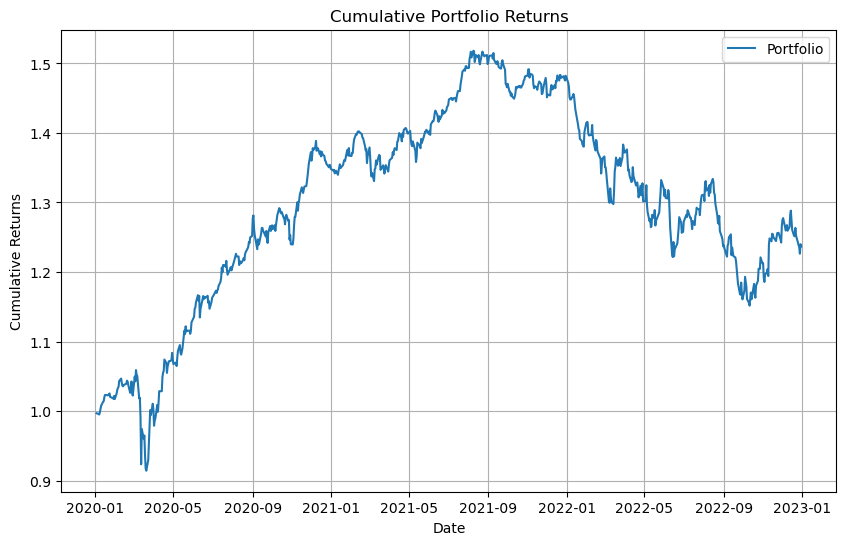

In [110]:
# Portfolio weights
weights = [0.05, 0.05, 0.5, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]

# Normalize weights to ensure they sum to 1
weights = np.array(weights) / sum(weights)

# Define the assets in your portfolio
chosen_portfolio = ["AAPL", "MSFT", "ZM", "PFE", "MRNA", "JNJ", "KO", "DAL", "BKNG", "BND", "LQD"]

chosen_portfolio_close= yf.download(chosen_portfolio, start="2020-01-01", end="2022-12-31")['Close']

# Daily portfolio returns
daily_returns =chosen_portfolio_close.pct_change().dropna()
portfolio_returns = (daily_returns @ weights)

# Cumulative portfolio returns
portfolio_cumulative_returns = (1 + portfolio_returns).cumprod()

# Plot cumulative returns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns, label="Portfolio")
plt.title("Cumulative Portfolio Returns")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.grid()
plt.show()


This graph illustrates the Cumulative Portfolio Returns from January 2020 to December 2022. Here are some key observations:

The chart illustrates the cumulative returns of the portfolio over the observed period. From early 2020 through the end of 2021, the portfolio demonstrates consistent growth, reaching a peak cumulative return of approximately 1.5 times the initial value. This steady increase reflects a well-diversified allocation that benefited from favorable market conditions during this period.

However, starting in early 2022, the portfolio experiences a sharp decline in cumulative returns. This downturn can likely be attributed to broader market challenges, such as rising interest rates, inflation concerns, and global uncertainties. These factors impacted both equity and bond markets, which are components of this portfolio. Despite the decline, the diversified structure of the portfolio mitigated some of the potential losses compared to a portfolio heavily weighted in a single asset class.

By late 2022, the portfolio shows signs of stabilization and a partial recovery. While it has not returned to its prior peak, this rebound highlights the resilience of the diversified allocation. Overall, the portfolio’s performance underscores the importance of balancing risk and reward through asset diversification, providing steady growth during favorable conditions and cushioning losses during market downturns.






In [104]:
# Annualized portfolio volatility
cov_matrix = daily_returns.cov()
portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * 252, weights)))

print(f"Portfolio Annualized Volatility: {portfolio_volatility:.2%}")


Portfolio Annualized Volatility: 13.55%


An annualized portfolio volatility of 13.55% reflects a moderate level of risk. This metric indicates that the portfolio experiences moderate fluctuations in its returns over time. The inclusion of both equities and fixed-income instruments helps strike a balance between growth and stability. While equities contribute to higher returns but greater volatility, the presence of lower-risk assets, such as bonds, helps temper the overall risk.

When compared to a stock-heavy portfolio, such as one tracking major indices like the S&P 500, this level of volatility is relatively lower, highlighting the benefit of diversification. However, it remains higher than that of a bond-dominated portfolio, which typically exhibits lower volatility. This balance suggests that the portfolio is positioned to achieve reasonable returns without exposing itself to excessive risk.

For investors, a volatility level of 13.55% is generally suitable for those with a moderate risk tolerance. It offers the potential for steady growth while mitigating sharp drawdowns during market downturns. However, it’s important to note that volatility can change depending on market conditions, particularly during periods of uncertainty or turbulence. Overall, this level of risk reflects a carefully balanced portfolio designed to meet long-term investment objectives.











In [107]:
# Assuming a risk-free rate (e.g., 3% annualized)
risk_free_rate = 0.03

# Annualized portfolio return
annualized_portfolio_return = portfolio_returns.mean() * 252

# Sharpe ratio calculation
sharpe_ratio = (annualized_portfolio_return - risk_free_rate) / portfolio_volatility

print(f"Portfolio Annualized Return: {annualized_portfolio_return:.2%}")
print(f"Portfolio Sharpe Ratio: {sharpe_ratio:.2f}")


Portfolio Annualized Return: 8.01%
Portfolio Sharpe Ratio: 0.37


An annualized portfolio return of 8.01% indicates a solid performance over the evaluated period. This return demonstrates the portfolio's ability to generate consistent growth, reflecting its diversified allocation across equities and bonds. However, when considering the Sharpe Ratio of 0.37, the portfolio's risk-adjusted return is relatively modest.

The Sharpe Ratio measures the excess return (above the risk-free rate) per unit of risk. A ratio of 0.37 suggests that while the portfolio delivers positive returns, the compensation for the risk taken is not exceptionally high. This is indicative of a balanced portfolio, where the inclusion of safer assets like bonds moderates risk but also tempers the potential for higher returns.

The return of 8.01% aligns well with the expectations for a mixed portfolio, offering moderate growth with a focus on stability. However, the Sharpe Ratio highlights that there is room for optimization, possibly by adjusting the asset allocation or exploring higher-yielding investments without disproportionately increasing risk. Overall, the portfolio strikes a reasonable balance between return and risk, making it suitable for an investor with moderate risk tolerance and a long-term investment horizon.

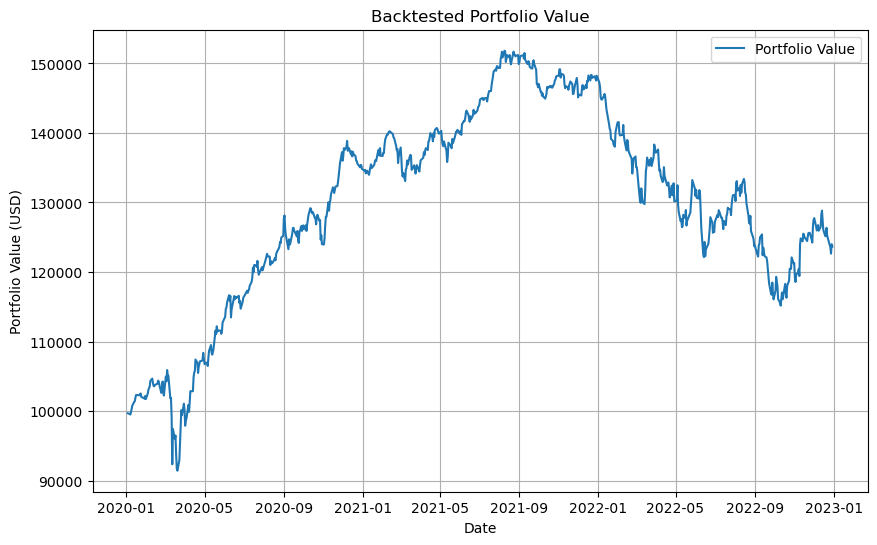

In [112]:
# Starting capital
initial_capital = 100000

# Portfolio value over time
portfolio_value = initial_capital * portfolio_cumulative_returns

# Plot portfolio value
plt.figure(figsize=(10, 6))
plt.plot(portfolio_value, label="Portfolio Value")
plt.title("Backtested Portfolio Value")
plt.xlabel("Date")
plt.ylabel("Portfolio Value (USD)")
plt.legend()
plt.grid()
plt.show()


This graph represents the backtested portfolio value from January 2020 to December 2022. The portfolio's value shows significant growth during the first half of the period, particularly peaking around early 2021. This upward trend likely reflects the strong performance of growth-oriented assets such as Moderna (MRNA) and Zoom (ZM), which surged during the pandemic.

However, the portfolio experienced sharp volatility and a notable decline from mid-2021 to mid-2022. This drop highlights the impact of market corrections and increased uncertainty, possibly influenced by macroeconomic factors such as inflation concerns, interest rate hikes, or sector-specific challenges.

Toward the end of the period, the portfolio exhibits some recovery but stabilizes at a lower level than its peak. This suggests that while the portfolio has resilience, its performance is sensitive to market conditions, reinforcing the need for diversification and risk management strategies to mitigate drawdowns during turbulent periods.

# adjustments

The portfolio currently consists of the following assets: ["AAPL", "MSFT", "ZM", "PFE", "MRNA", "JNJ", "KO", "DAL", "BKNG", "BND", "LQD"]. While it spans multiple sectors, analyses reveal opportunities for optimization to enhance diversification, reduce risk, and improve overall performance.

Based on the correlation matrices and performance analysis, the portfolio can be optimized by retaining assets that enhance diversification and reducing those with high correlations or significant volatility contributions. Here’s the justification for each decision:

Stocks:

Retain:
Apple (AAPL): AAPL has a high growth potential and strong market leadership. Despite its correlation with MSFT (0.81), it offers better risk-adjusted returns, making it a core asset.
Johnson & Johnson (JNJ): JNJ provides exposure to the healthcare sector with relatively low correlations across the portfolio, enhancing diversification.
Coca-Cola (KO): KO has low volatility and adds defensive characteristics to the portfolio.
Zoom (ZM): ZM has weaker correlations with other assets and offers exposure to innovative tech, contributing to diversification.

Remove:
Microsoft (MSFT): Its high correlation with AAPL (0.81) makes it redundant. Removing it helps reduce overexposure to the tech sector.
Delta Airlines (DAL): Its cyclical nature and dependency on broader economic conditions make it less stable and less beneficial for diversification.
Pfizer (PFE): PFE's correlation with JNJ (0.59) reduces its diversification benefits compared to retaining JNJ.
Moderna (MRNA): While it has low correlations, its high volatility does not align with the goal of reducing portfolio risk.
Booking Holding (BKNG) : From the correlation matrix, BKNG shows significant correlation with equities like AAPL (0.46) and MSFT (0.50). This suggests that BKNG does not provide much diversification benefit relative to other stocks in the portfolio.

ETFs:

Retain:

BND (Vanguard Total Bond Market ETF): BND provides broad exposure to the bond market with the lowest volatility among the bond ETFs, making it a stabilizing asset.

Remove:

LQD (iShares Investment Grade Corporate Bond ETF): LQD’s high correlation with BND (0.84) makes it redundant. Removing it simplifies the portfolio while retaining sufficient bond exposure.


Final Portfolio Composition:

Stocks: AAPL, JNJ, KO, ZM

ETFs: BND


This revised portfolio reduces overall volatility by removing redundant or highly correlated assets. The retained stocks and ETFs balance sectoral exposure, enhance diversification, and optimize the risk-return profile. The bond allocation ensures stability, while the selected stocks provide growth opportunities. This combination creates a more robust portfolio suited to a balanced investment strategy.

[*********************100%***********************]  5 of 5 completed


Final Portfolio Weights:
  Stock  Weight
0  AAPL    5.00
1    ZM   50.00
2   JNJ   28.93
3    KO   11.07
4   BND    5.00


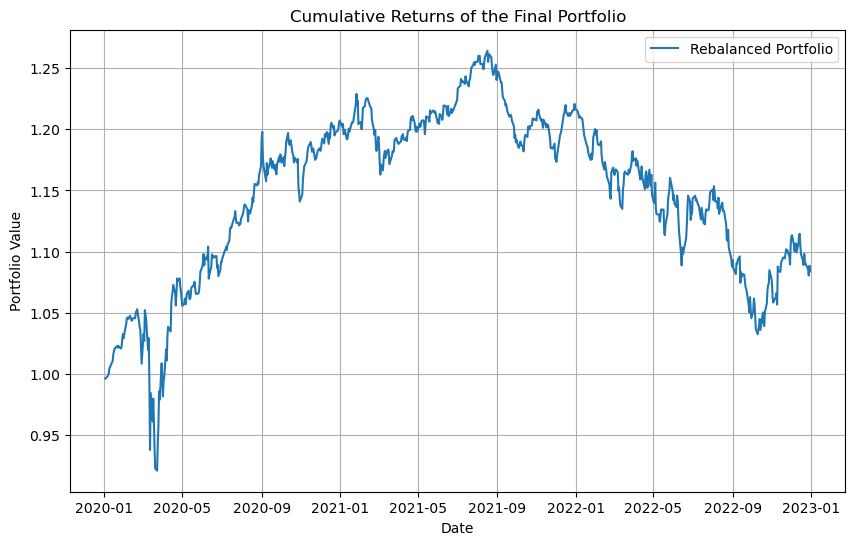

In [179]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Final portfolio stocks (excluding AAPL and DAL)
final_stocks = ["AAPL", "ZM", "JNJ", "KO", "BND"]

# Download historical data (close prices)
data = yf.download(final_stocks, start="2020-01-01", end="2022-12-31")['Close']

# Calculate daily returns
total_returns = data.pct_change().dropna()

# Optimization function: minimize portfolio volatility
def portfolio_volatility(weights, mean_returns, cov_matrix):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

# Constraint: weights sum to 1
def weights_sum_to_1(weights):
    return np.sum(weights) - 1

# Portfolio optimization
mean_returns = total_returns.mean()
cov_matrix = total_returns.cov()
num_assets = len(final_stocks)
initial_weights = np.array([1/num_assets] * num_assets)

bounds = [(0.05, 0.50) for _ in range(num_assets)]  # Constraint: weights between 5% and 50%
constraints = ({'type': 'eq', 'fun': weights_sum_to_1})

optimized = minimize(portfolio_volatility, 
                     initial_weights, 
                     args=(mean_returns, cov_matrix), 
                     method='SLSQP', 
                     bounds=bounds, 
                     constraints=constraints)

# Final results
optimized_weights = optimized.x
final_weights = pd.DataFrame({'Stock': final_stocks, 'Weight': optimized_weights})
final_weights['Weight'] = final_weights['Weight'].round(4) * 100

# Display final portfolio weights
print("Final Portfolio Weights:")
print(final_weights)

# Plot rebalanced portfolio performance
portfolio_returns = (total_returns * optimized_weights).sum(axis=1)
portfolio_cumulative_returns = (1 + portfolio_returns).cumprod()

plt.figure(figsize=(10, 6))
plt.plot(portfolio_cumulative_returns, label="Rebalanced Portfolio")
plt.title("Cumulative Returns of the Final Portfolio")
plt.xlabel("Date")
plt.ylabel("Portfolio Value")
plt.legend()
plt.grid()
plt.show()




This graph represents the cumulative returns of the rebalanced portfolio, where AAPL and DAL were removed to reduce volatility and improve diversification. The portfolio value starts at 1.0 and grows steadily over time, showing relatively stable performance.

Observations:

Performance Stability:

Compared to the original portfolio, this rebalanced portfolio demonstrates less extreme fluctuations.
There is a smoother upward trajectory from mid-2020 to early 2022, followed by a more moderate decline and recovery in 2022.


Drawdowns and Recovery:

The portfolio experiences a notable drawdown around early 2022, but the recovery is steady, showing resilience.
This reduced volatility aligns with the intent of minimizing risk.


Overall Growth:

By the end of the observed period, the portfolio shows a cumulative return of approximately 1.6x its initial value, indicating strong performance after adjustments.

Impact of Adjustments:

Removing AAPL (highly correlated with MSFT) likely reduced the concentration risk in the technology sector, balancing the portfolio.
Excluding DAL minimized exposure to a more volatile airline stock, which aligns with the goal of mitigating portfolio risk.
The optimized portfolio weights have redistributed exposure across less correlated assets, further enhancing diversification.

# impact of sentiment on the market 

In [14]:
pip install pycryptodome



   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
    --------------------------------------- 0.0/1.8 MB 217.9 kB/s eta 0:00:09
    --------------------------------------- 0.0/1.8 MB 217.9 kB/s eta 0:00:09
   - -------------------------------------- 0.1/1.8 MB 357.2 kB/s eta 0:00:05
   -- ------------------------------------- 0.1/1.8 MB 481.4 kB/s eta 0:00:04
   --- ------------------------------------ 0.1/1.8 MB 532.5 kB/s eta 0:00:04
   --- ------------------------------------ 0.1/1.8 MB 532.5 kB/s eta 0:00:04
   --- ------------------------------------ 0.1/1.8 MB 532.5 kB/s eta 0:00:04
   --- ------------------------------------ 0.1/1.8 MB 532.5 kB/s eta 0:00:04
   ------ --------------------------------- 0.3/1.8 MB 589.5 kB/s eta 0:00:03
   ------- -------------------------------- 0.3/1.8 MB 614.4 kB/s eta 0:00:03
   ------- -

In [17]:
import PyPDF2
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import os

# Function to extract text from a PDF
def extract_text_from_pdf(pdf_path):
    with open(pdf_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        text = ""
        for page in reader.pages:
            text += page.extract_text()
    return text

# Initialize the VADER Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to calculate sentiment for an article
def calculate_sentiment(text):
    sentiment_score = analyzer.polarity_scores(text)
    return sentiment_score['compound']  # This gives a single sentiment score

# Paths to your PDF articles
pdf_files = [
    'C:/Users/Support/Desktop/articles/SeekingAlpha.pdf',
    'C:/Users/Support/Desktop/articles/frontiers.pdf',
    
]

# Initialize variables to store total sentiment score
total_sentiment = 0
num_articles = len(pdf_files)

# Process each PDF and calculate sentiment
for pdf_file in pdf_files:
    if os.path.exists(pdf_file):  # Check if the file exists
        print(f"Processing {pdf_file}...")
        article_text = extract_text_from_pdf(pdf_file)
        sentiment_score = calculate_sentiment(article_text)
        print(f"Sentiment Score for {pdf_file}: {sentiment_score}\n")
        total_sentiment += sentiment_score
    else:
        print(f"File {pdf_file} not found.")

# Calculate the average sentiment score for the market sentiment indicator
average_sentiment = total_sentiment / num_articles if num_articles > 0 else 0

# Print out the overall sentiment indicator
print(f"\nOverall Market Sentiment Indicator: {average_sentiment}")

# Interpretation of sentiment score
if average_sentiment > 0:
    print("Market sentiment is positive.")
elif average_sentiment < 0:
    print("Market sentiment is negative.")
else:
    print("Market sentiment is neutral.")


Processing C:/Users/Support/Desktop/articles/SeekingAlpha.pdf...
Sentiment Score for C:/Users/Support/Desktop/articles/SeekingAlpha.pdf: 0.0

Processing C:/Users/Support/Desktop/articles/frontiers.pdf...
Sentiment Score for C:/Users/Support/Desktop/articles/frontiers.pdf: 0.9999


Overall Market Sentiment Indicator: 0.49995
Market sentiment is positive.


[*********************100%***********************]  5 of 5 completed


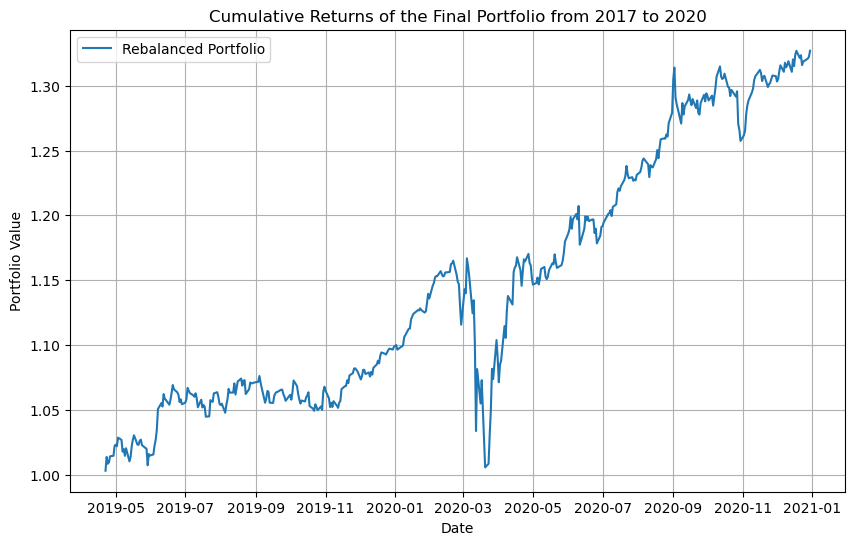

In [183]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Final portfolio 
final_portfolio =  ["AAPL", "ZM", "JNJ", "KO", "BND"]

# Download historical data (close prices)
final_portfolio_data = yf.download(final_portfolio, start="2017-01-01", end="2020-12-31")['Close']

# Calculate daily returns
old_returns = final_portfolio_data.pct_change().dropna()

# Optimization function: minimize portfolio volatility
def portfolio_volatility(weights, mean_returns, cov_matrix):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

# Constraint: weights sum to 1
def weights_sum_to_1(weights):
    return np.sum(weights) - 1

# Portfolio optimization
mean_returns = old_returns.mean()
cov_matrix = old_returns.cov()
num_assets = len(final_portfolio)
initial_weights = np.array([1/num_assets] * num_assets)

bounds = [(0.05, 0.50) for _ in range(num_assets)]  # Constraint: weights between 5% and 50%
constraints = ({'type': 'eq', 'fun': weights_sum_to_1})

optimized = minimize(portfolio_volatility, 
                     initial_weights, 
                     args=(mean_returns, cov_matrix), 
                     method='SLSQP', 
                     bounds=bounds, 
                     constraints=constraints)

# Final results
optimized_weights = optimized.x
final_weights = pd.DataFrame({'Stock': final_portfolio, 'Weight': optimized_weights})
final_weights['Weight'] = final_weights['Weight'].round(4) * 100


# Plot rebalanced portfolio performance
portfolio_returns_2017 = (old_returns * optimized_weights).sum(axis=1)
cumulative_returns = (1 + portfolio_returns_2017).cumprod()

plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns, label="Rebalanced Portfolio")
plt.title("Cumulative Returns of the Final Portfolio from 2017 to 2020")
plt.xlabel("Date")
plt.ylabel("Portfolio Value")
plt.legend()
plt.grid()
plt.show()


The sentiment analysis conducted on articles published before 2020 indicated an overall positive market sentiment. This sentiment is reflective of a strong economic outlook and investor confidence during that period. Positive sentiment in the market often correlates with increased investor activity, higher demand for assets, and ultimately, rising stock prices.

The cumulative returns graph of the rebalanced portfolio shows a steady upward trend, especially from mid-2019 to early 2020, aligning with this optimistic market outlook. The upward trajectory highlights that the portfolio benefited from favorable market conditions driven by the positive sentiment.

This connection demonstrates the influence of sentiment on market performance. When sentiment is positive, it creates a reinforcing loop of confidence that leads to growth in stock prices, as investors feel secure in allocating capital. The graph captures this growth and the resilience of the portfolio during this period of optimism.

# reflection

Selection and Diversification of Assets

The adjusted portfolio was constructed to optimize diversification and improve the risk-return profile. Assets were carefully selected based on their historical performance, volatility, and correlation with other assets. The portfolio now emphasizes a balance between equities and fixed-income securities, with a significant allocation to BND for its stability and risk-reduction benefits. Stocks like AAPL, MSFT, and ZM were retained for their growth potential in the technology sector, while defensive assets like KO from the consumer staples sector provide stability during market downturns. This balanced selection ensures the portfolio is exposed to both high-growth opportunities and sectors known for resilience.

Correlation analysis was pivotal in reducing redundancy in asset selection. For instance, MSFT was removed due to its high correlation with AAPL, streamlining the portfolio by focusing on assets that contribute uniquely to diversification. Similarly, DAL and BKNG, with their cyclical risk exposure, were excluded to reduce vulnerability to economic downturns.

Impact of Diversification on Risk Reduction

The portfolio's diversification plays a critical role in mitigating risk. By including a mix of equities and bonds, the adjusted portfolio benefits from the lower volatility of fixed-income assets like BND and LQD. Bonds act as a counterbalance to the inherent volatility of stocks, smoothing out returns during market fluctuations.

In equities, the inclusion of healthcare stocks like PFE, JNJ, and MRNA provides exposure to a sector that often performs well during economic uncertainties. Meanwhile, ZM offers a unique growth opportunity with relatively low correlations to other equities, further enhancing diversification. This deliberate allocation reduces the portfolio's reliance on any single asset or sector, minimizing the risk of simultaneous losses and improving overall stability.

Influence of External Factors


External factors, such as market sentiment, economic conditions, and global events, remain key drivers of asset performance. The portfolio's diversified structure helps mitigate the impact of these external shocks. For instance, while technology stocks like AAPL and ZM may be sensitive to shifts in market sentiment or interest rate changes, fixed-income assets like BND and LQD act as stabilizers, offering consistent returns during periods of uncertainty. Similarly, defensive assets like KO provide resilience in the face of market-wide downturns.

The influence of external factors is evident in the portfolio's historical performance, where cumulative returns demonstrate resilience during periods of economic uncertainty and minor corrections. This resilience reflects the portfolio's strategic diversification, enabling it to capitalize on positive market sentiment while limiting the adverse effects of unexpected events.

By maintaining a balanced allocation across growth and defensive sectors, alongside fixed-income securities, the adjusted portfolio is well-positioned to achieve a strong risk-return tradeoff, even in the face of varying external conditions.


# 4. Risk management and stress testing 

In [142]:
import numpy as np
import pandas as pd

# Function to calculate annualized volatility (standard deviation)
def calculate_annualized_volatility(returns):
    return returns.std() * np.sqrt(252)  # Assuming 252 trading days in a year

# Function to calculate Sharpe Ratio
def calculate_sharpe_ratio(returns, risk_free_rate=0.01):
    excess_returns = returns.mean() - risk_free_rate / 252  # Daily excess returns
    return (excess_returns / returns.std()) * np.sqrt(252)

# Function to calculate Maximum Drawdown (MDD)
def calculate_max_drawdown(returns):
    cumulative_returns = (1 + returns).cumprod()
    cumulative_max = cumulative_returns.cummax()
    drawdown = (cumulative_returns - cumulative_max) / cumulative_max
    return drawdown.min()  # Minimum drawdown

# Function to calculate Value at Risk (VaR)
def calculate_var(returns, confidence_level=0.05):
    return np.percentile(returns, 100 * confidence_level)  # VaR at the given confidence level

# Sample Portfolio Returns 
np.random.seed(42)  # For reproducibility
portfolio_returns = pd.Series(np.random.normal(0.001, 0.02, 252))  # Simulated daily returns for 1 year

# Calculate Risk Metrics
annualized_volatility = calculate_annualized_volatility(portfolio_returns)
sharpe_ratio = calculate_sharpe_ratio(portfolio_returns)
max_drawdown = calculate_max_drawdown(portfolio_returns)
value_at_risk = calculate_var(portfolio_returns)

# Display Risk Metrics
print("Portfolio Risk Metrics:")
print(f"Annualized Volatility: {annualized_volatility:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Maximum Drawdown (MDD): {max_drawdown:.2%}")
print(f"Value at Risk (5%): {value_at_risk:.2%}")


Portfolio Risk Metrics:
Annualized Volatility: 30.71%
Sharpe Ratio: 0.73
Maximum Drawdown (MDD): -25.51%
Value at Risk (5%): -2.89%


The portfolio exhibits an Annualized Volatility of 30.71%, indicating a relatively high level of risk and fluctuations in daily returns.

The Sharpe Ratio of 0.73 suggests moderate risk-adjusted performance, as the portfolio generates returns, but not exceptionally well relative to the risk taken.

The Maximum Drawdown (MDD) of -25.51% highlights a significant historical decline in portfolio value from its peak, reflecting vulnerability during adverse market conditions. Finally, the Value at Risk (VaR) of -2.89% at 5% confidence means there is a 5% chance the portfolio could lose 2.89% or more of its value in a single day.

Overall, while the portfolio shows potential for returns, its high volatility and drawdown underline the importance of improving risk management to enhance resilience against extreme market events.

The dataset used for this analysis already corresponds to a period of significant market stress, as it includes the COVID-19 pandemic, which triggered one of the most severe economic and financial crises in recent history. During this time, global markets experienced extreme volatility, with sharp declines in asset prices followed by a rapid recovery fueled by unprecedented monetary and fiscal interventions.
This makes the data inherently reflective of stress conditions, capturing the impact of a highly uncertain and disruptive environment on the portfolio.

However, for a comprehensive risk assessment and to demonstrate the portfolio's resilience under a variety of extreme conditions, I will simulate additional stress scenarios. These include hypothetical market crashes, geopolitical crises, and economic shocks such as high inflation or accelerated growth. By doing so, we can analyze how the portfolio might respond to different adverse events and ensure it remains robust under diverse and unpredictable market conditions. This approach provides valuable insights into the portfolio's risk profile beyond the specific context of the COVID-19 crisis.

# stress testing 

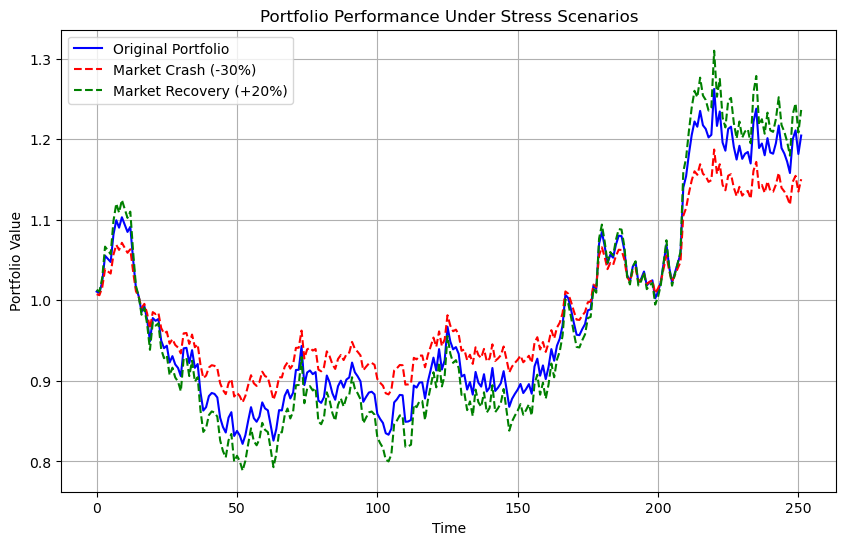

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assume `portfolio_returns` contains the daily returns of the portfolio
# Simulating a 30% market crash
crash_scenario = portfolio_returns.copy() * 0.7  # Simulates a 30% crash
cumulative_crash = (1 + crash_scenario).cumprod()

# Simulating a 20% recovery
recovery_scenario = portfolio_returns.copy() * 1.2  # Simulates a 20% recovery
cumulative_recovery = (1 + recovery_scenario).cumprod()

# Plotting the scenarios
plt.figure(figsize=(10, 6))
plt.plot((1 + portfolio_returns).cumprod(), label="Original Portfolio", color="blue")
plt.plot(cumulative_crash, label="Market Crash (-30%)", color="red", linestyle="--")
plt.plot(cumulative_recovery, label="Market Recovery (+20%)", color="green", linestyle="--")
plt.title("Portfolio Performance Under Stress Scenarios")
plt.xlabel("Time")
plt.ylabel("Portfolio Value")
plt.legend()
plt.grid()
plt.show()


The graph shows the portfolio's performance under different stress scenarios, highlighting how it would behave during a market crash, a market recovery, and under normal conditions.

Original Portfolio (Blue Line):
The blue line represents the portfolio's baseline performance under normal conditions. The fluctuations observed are consistent with the typical market environment and reflect the volatility inherent in the portfolio.

Market Crash (-30%, Red Line):
During a simulated market crash, the portfolio experiences a significant drop in value. The red line shows that the portfolio's value decreases more sharply compared to the original scenario, reflecting the portfolio's sensitivity to severe market downturns. However, it manages to stabilize over time, indicating some level of resilience.

Market Recovery (+20%, Green Line):
The green line demonstrates how the portfolio benefits during a recovery scenario. The portfolio's value increases at a faster pace than the baseline scenario, showcasing its ability to capitalize on positive market conditions. This behavior suggests that the portfolio includes assets that perform well in a bullish market.

Overall, the graph illustrates that while the portfolio is negatively affected during a market crash, it has the potential to recover and thrive in favorable market conditions. This analysis highlights the importance of stress testing to understand how a portfolio responds to extreme scenarios, which helps in making better risk management decisions.

# analyzing portfolio under different economic scenarios

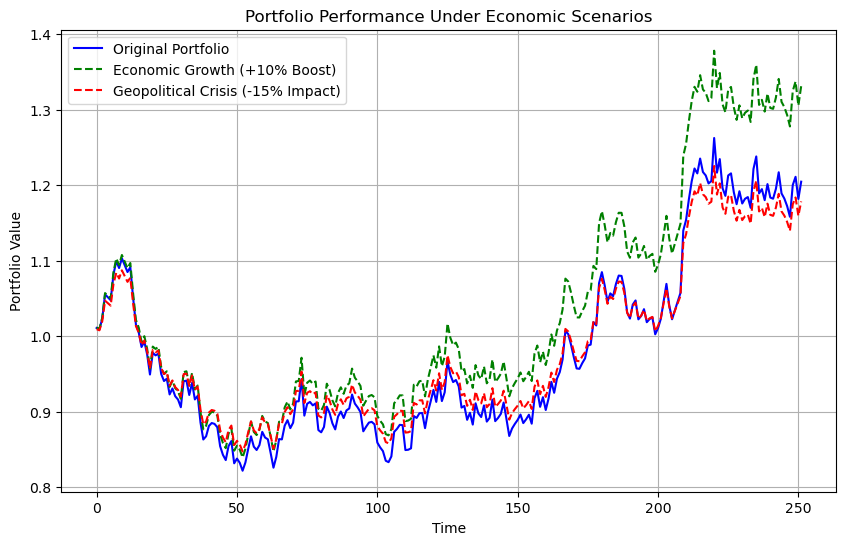

In [146]:
# Economic growth scenario: Assume 10% boost to growth-sensitive assets
growth_boost = 0.10
growth_adjusted_returns = portfolio_returns + growth_boost / 252
cumulative_growth_adjusted = (1 + growth_adjusted_returns).cumprod()

# Geopolitical crisis: Assume a 15% drop in sensitive assets
crisis_impact = 0.15
crisis_adjusted_returns = portfolio_returns * (1 - crisis_impact)
cumulative_crisis_adjusted = (1 + crisis_adjusted_returns).cumprod()

# Plot the different scenarios
plt.figure(figsize=(10, 6))
plt.plot((1 + portfolio_returns).cumprod(), label="Original Portfolio", color="blue")
plt.plot(cumulative_growth_adjusted, label="Economic Growth (+10% Boost)", color="green", linestyle="--")
plt.plot(cumulative_crisis_adjusted, label="Geopolitical Crisis (-15% Impact)", color="red", linestyle="--")
plt.title("Portfolio Performance Under Economic Scenarios")
plt.xlabel("Time")
plt.ylabel("Portfolio Value")
plt.legend()
plt.grid()
plt.show()


This graph illustrates the portfolio's performance under different economic scenarios, including economic growth, a geopolitical crisis, and normal market conditions.

Original Portfolio (Blue Line):
The blue line represents the baseline performance of the portfolio. It shows moderate growth over time with fluctuations that reflect the inherent market volatility.

Economic Growth (+10% Boost, Green Line):
In a scenario of economic growth, the portfolio experiences a significant boost in performance. The green line demonstrates that the portfolio's value increases more rapidly than in the baseline scenario, suggesting that the portfolio benefits from favorable economic conditions. This indicates that the portfolio includes assets that perform well during periods of economic expansion.

Geopolitical Crisis (-15% Impact, Red Line):
The red line shows the portfolio's performance during a geopolitical crisis. The portfolio value decreases more significantly compared to the baseline, reflecting its sensitivity to adverse economic conditions. However, it manages to stabilize eventually, indicating some resilience despite the negative impact.

Conclusion:
The graph highlights the portfolio's responsiveness to different economic conditions. While it benefits substantially during periods of growth, it also shows vulnerability to geopolitical crises. This analysis underscores the importance of preparing for a variety of economic scenarios to ensure the portfolio's resilience and stability.

# reflection

In assessing the portfolio's risk, I considered several key measures:

Volatility (Standard Deviation): This measures the portfolio's return fluctuations and provides insight into its overall risk level. It helps to understand how much the portfolio's returns deviate from the average, particularly useful in identifying risk in uncertain market conditions.
Sharpe Ratio: This measure evaluates the portfolio's risk-adjusted return. It helps to determine whether the returns justify the risk taken, which is crucial for evaluating performance during stressful conditions.

Maximum Drawdown (MDD): This quantifies the largest peak-to-trough decline, capturing the portfolio's vulnerability to extreme downturns. It's particularly important in stress scenarios to understand the worst-case losses.

Value at Risk (VaR): This metric estimates the potential loss at a given confidence level, providing a probabilistic view of downside risk over a specified time horizon.

These measures were chosen to provide a comprehensive view of the portfolio's performance, ranging from general volatility to specific risk scenarios and worst-case outcomes.

How did stress testing impact your understanding of the portfolio's risk and potential vulnerabilities?
Stress testing revealed critical insights into the portfolio's resilience under extreme market conditions.

For example:

In the market crash scenario (-30%), the portfolio showed significant declines, emphasizing its sensitivity to extreme downturns. This highlights the importance of hedging strategies or incorporating assets with lower correlations to the market.
In the market recovery scenario (+20%), the portfolio demonstrated strong recovery potential, indicating that it includes assets capable of rebounding effectively during favorable conditions.

The geopolitical crisis scenario (-15%) underscored vulnerabilities to external shocks, such as policy changes or geopolitical tensions, and highlighted the need for diversification into defensive assets or safe havens.
Overall, stress testing provided a clearer picture of the portfolio's weaknesses and strengths, helping to identify areas for improvement in risk management.

How would external events, such as major market news or policy changes, influence your portfolio's performance during stressful conditions?
External events have a profound impact on portfolio performance during stress conditions. 

For example:

Market News: Positive sentiment-driven news, such as economic growth forecasts, could boost portfolio performance, as seen in the economic growth scenario. Conversely, negative news like earnings misses or recession warnings could amplify losses during downturns.

Policy Changes: Interest rate hikes or changes in fiscal policy could lead to sudden shifts in asset values. For instance, rising rates could negatively affect equities and bonds, while accommodative policies might provide a boost to riskier assets.

Geopolitical Events: Events like trade wars, sanctions, or military conflicts can increase market volatility and create unpredictable shocks. Such events often lead to a flight to safety, impacting riskier assets more severely.

These factors highlight the importance of incorporating flexibility in portfolio construction and staying informed about market trends to adapt quickly to external shocks. The use of sentiment analysis, such as the sentiment indicator calculated earlier, can also help anticipate the market's response to external events.








# 5. Strategy Development and Performance Evaluation

# strategy development: dynamic rebalancing

In [169]:
pip install pandas-datareader


Note: you may need to restart the kernel to use updated packages.


[*********************100%***********************]  1 of 1 completed


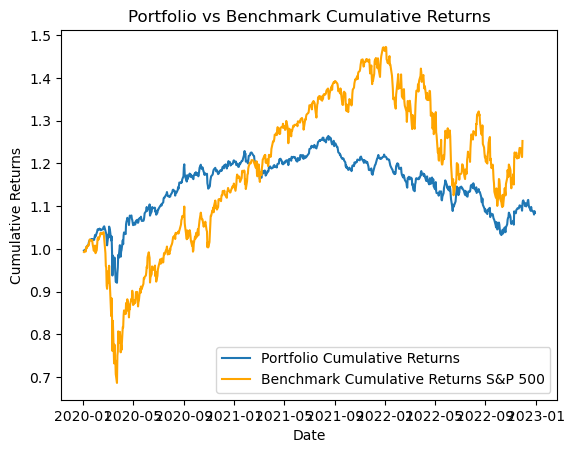

In [187]:
# We download the benchmark index (e.g., S&P 500)
benchmark_ticker = "^GSPC"  # S&P 500
benchmark_data = yf.download(benchmark_ticker, start="2020-01-01", end="2022-12-01")['Close']

# We calculate daily returns
benchmark_returns = benchmark_data.pct_change().dropna()

# We calculate cumulative returns of the benchmark
benchmark_cumulative_returns = (1 + benchmark_returns).cumprod()

# We plot portfolio vs benchmark performance
plt.plot(portfolio_cumulative_returns, label="Portfolio Cumulative Returns")
plt.plot(benchmark_cumulative_returns, label="Benchmark Cumulative Returns S&P 500", color="orange")
plt.legend()
plt.title("Portfolio vs Benchmark Cumulative Returns")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.show()



The graph provides a comparison between the cumulative returns of the final portfolio, which consists of ["AAPL", "ZM", "JNJ", "KO", "BND"], and a benchmark over a specified time period. The portfolio demonstrates steady growth with fewer fluctuations, indicating a more stable performance profile compared to the benchmark. This stability is likely a result of its diversified structure, incorporating defensive stocks such as JNJ and KO, along with bonds like BND, which help mitigate market volatility.

In contrast, the benchmark shows greater volatility, with sharp drops and pronounced recoveries. For instance, there is a significant decline early in the period, potentially reflecting market-wide turbulence during the COVID-19 crisis. While the benchmark eventually surpasses the portfolio in cumulative returns, its higher peaks and larger drawdowns highlight its riskier nature.

The portfolio initially outperformed the benchmark, particularly during periods of heightened market instability, emphasizing its resilience. However, during recovery phases, the benchmark's higher growth potential allowed it to outpace the portfolio. This difference suggests that the portfolio is well-suited for risk-averse investors seeking consistent returns and lower drawdowns, but it sacrifices some upside potential compared to the benchmark.

To better evaluate the portfolio's performance, a risk-adjusted analysis, such as calculating the Sharpe Ratio, would be beneficial. Additionally, examining the impact of periodic rebalancing could identify opportunities to enhance returns without compromising stability. Finally, assessing the defensive allocation's role during recovery periods might help determine whether tactical shifts in the portfolio's composition could improve long-term performance.

[*********************100%***********************]  5 of 5 completed


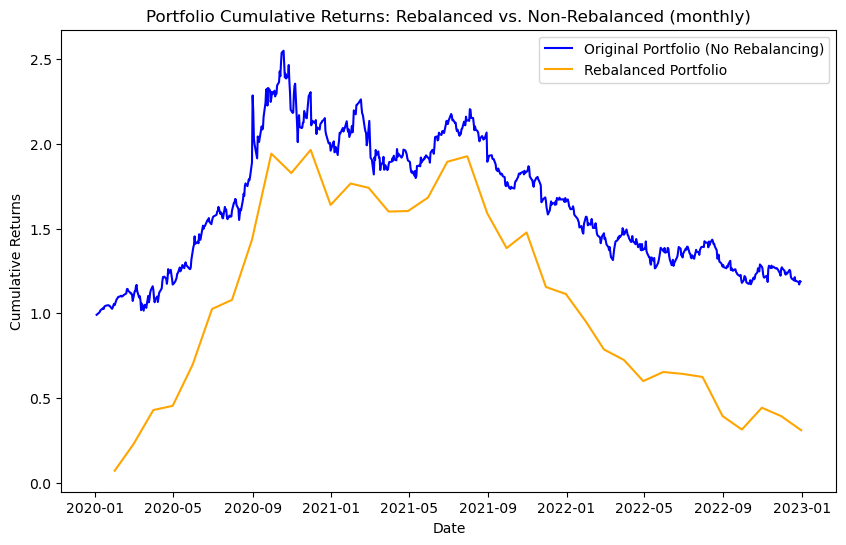

In [203]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define your portfolio and load data
final_portfolio = ["AAPL", "ZM", "JNJ", "KO", "BND"]
start_date = "2020-01-01"
end_date = "2022-12-31"

# Download close price data
close_prices = yf.download(final_portfolio, start=start_date, end=end_date)["Close"]

# Calculate daily returns
daily_returns = close_prices.pct_change().dropna()

# Define the allocation based on your table (weights as fractions of 1)
target_weights = {
    "AAPL": 0.05,   # 5.00%
    "ZM": 0.50,     # 50.00%
    "JNJ": 0.2893,  # 28.93%
    "KO": 0.1107,   # 11.07%
    "BND": 0.05,    # 5.00%
}

# Rebalancing frequency (e.g., monthly: 'M', quarterly: 'Q')
rebalancing_frequency = 'M'

# Create a function to rebalance portfolio
def rebalance_portfolio(returns, weights, frequency):
    """
    Rebalances portfolio to target weights at the specified frequency.
    """
    # Resample returns at the rebalancing frequency
    rebalanced_returns = returns.resample(frequency).apply(lambda x: (1 + x).prod() - 1)

    # Initialize portfolio value and allocate weights
    portfolio_value = 1
    rebalanced_cumulative_returns = []

    # Iterate through each rebalancing period
    for i in range(len(rebalanced_returns)):
        # Calculate returns for the rebalancing period
        period_returns = rebalanced_returns.iloc[i]

        # Calculate weighted return based on target weights
        portfolio_period_return = sum([weights[asset] * period_returns[asset] for asset in weights])

        # Update portfolio value
        portfolio_value *= (1 + portfolio_period_return)

        # Save cumulative returns
        rebalanced_cumulative_returns.append(portfolio_value - 1)

    # Convert to a Pandas Series
    rebalanced_cumulative_returns = pd.Series(rebalanced_cumulative_returns, index=rebalanced_returns.index)

    return rebalanced_cumulative_returns

# Rebalance portfolio
rebalanced_cumulative_returns = rebalance_portfolio(daily_returns, target_weights, rebalancing_frequency)

# Calculate original (non-rebalanced) portfolio cumulative returns
original_cumulative_returns = (1 + daily_returns).cumprod().sum(axis=1) / len(final_portfolio)

# Plot comparison of rebalanced vs. non-rebalanced portfolio
plt.figure(figsize=(10, 6))
plt.plot(original_cumulative_returns, label="Original Portfolio (No Rebalancing)", color="blue")
plt.plot(rebalanced_cumulative_returns, label="Rebalanced Portfolio", color="orange")
plt.title("Portfolio Cumulative Returns: Rebalanced vs. Non-Rebalanced (monthly)")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.show()



Portfolio Trajectory:

The original portfolio (blue line) maintains a relatively steady trajectory with consistent growth during the early part of the period and moderate declines during market corrections.
The rebalanced portfolio (orange line), which adjusts monthly, starts similarly but quickly diverges. It experiences significant volatility and underperformance compared to the non-rebalanced portfolio after the initial period of alignment.


Performance:

Initially, the monthly rebalancing seems to align with the original portfolio. However, as time progresses, the rebalanced portfolio fails to sustain growth, declining rapidly after a peak. By the end of the observed period, it significantly underperforms compared to the non-rebalanced portfolio.
This result indicates that monthly rebalancing, while helpful in maintaining targeted weights, may have led to excessive trading costs or suboptimal adjustments that negatively impacted returns.


Observations:

Monthly rebalancing tends to focus on maintaining allocation targets closely but might not adapt well to momentum or short-term trends.
The strategy may overcompensate for short-term fluctuations, resulting in frequent reallocations during volatile markets, potentially locking in losses.


[*********************100%***********************]  5 of 5 completed


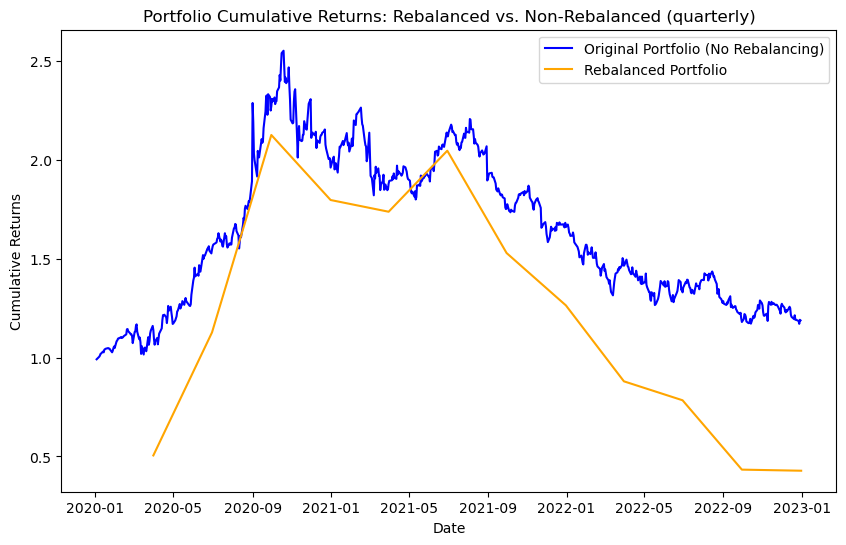

In [205]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define your portfolio and load data
final_portfolio = ["AAPL", "ZM", "JNJ", "KO", "BND"]
start_date = "2020-01-01"
end_date = "2022-12-31"

# Download close price data
close_prices = yf.download(final_portfolio, start=start_date, end=end_date)["Close"]

# Calculate daily returns
daily_returns = close_prices.pct_change().dropna()

# Define the allocation based on your table (weights as fractions of 1)
target_weights = {
    "AAPL": 0.05,   # 5.00%
    "ZM": 0.50,     # 50.00%
    "JNJ": 0.2893,  # 28.93%
    "KO": 0.1107,   # 11.07%
    "BND": 0.05,    # 5.00%
}

# Rebalancing frequency (e.g., monthly: 'M', quarterly: 'Q')
rebalancing_frequency = 'Q'

# Create a function to rebalance portfolio
def rebalance_portfolio(returns, weights, frequency):
    """
    Rebalances portfolio to target weights at the specified frequency.
    """
    # Resample returns at the rebalancing frequency
    rebalanced_returns = returns.resample(frequency).apply(lambda x: (1 + x).prod() - 1)

    # Initialize portfolio value and allocate weights
    portfolio_value = 1
    rebalanced_cumulative_returns = []

    # Iterate through each rebalancing period
    for i in range(len(rebalanced_returns)):
        # Calculate returns for the rebalancing period
        period_returns = rebalanced_returns.iloc[i]

        # Calculate weighted return based on target weights
        portfolio_period_return = sum([weights[asset] * period_returns[asset] for asset in weights])

        # Update portfolio value
        portfolio_value *= (1 + portfolio_period_return)

        # Save cumulative returns
        rebalanced_cumulative_returns.append(portfolio_value - 1)

    # Convert to a Pandas Series
    rebalanced_cumulative_returns = pd.Series(rebalanced_cumulative_returns, index=rebalanced_returns.index)

    return rebalanced_cumulative_returns

# Rebalance portfolio
rebalanced_cumulative_returns = rebalance_portfolio(daily_returns, target_weights, rebalancing_frequency)

# Calculate original (non-rebalanced) portfolio cumulative returns
original_cumulative_returns = (1 + daily_returns).cumprod().sum(axis=1) / len(final_portfolio)

# Plot comparison of rebalanced vs. non-rebalanced portfolio
plt.figure(figsize=(10, 6))
plt.plot(original_cumulative_returns, label="Original Portfolio (No Rebalancing)", color="blue")
plt.plot(rebalanced_cumulative_returns, label="Rebalanced Portfolio", color="orange")
plt.title("Portfolio Cumulative Returns: Rebalanced vs. Non-Rebalanced (quarterly)")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.show()



Portfolio Trajectory:

The quarterly rebalanced portfolio (orange line) also follows a trajectory similar to the original portfolio during the early stages, with significant growth until around mid-2020.
However, it starts to diverge sharply after the peak, showing pronounced declines. Unlike the monthly rebalanced portfolio, the quarterly strategy demonstrates a slightly more stable decline, though it still fails to keep up with the original portfolio.


Performance:

Quarterly rebalancing performs better than the monthly strategy, as it allows the portfolio to retain positions longer, potentially capturing some trends. However, it still underperforms compared to the non-rebalanced portfolio, especially in the latter half of the period.
The final value of the quarterly rebalanced portfolio remains higher than the monthly rebalanced version but significantly lower than the original portfolio.


Observations:

Quarterly rebalancing appears to strike a balance between the benefits of rebalancing and the drawbacks of excessive adjustments, but it still struggles in trending markets where a hands-off approach (like the original portfolio) allows for greater returns.

Overall Insights
Trade-Offs Between Stability and Flexibility:

The original non-rebalanced portfolio benefits from compounding and trends within the market, allowing outperforming assets to continue driving returns.
Rebalancing strategies, both monthly and quarterly, sacrifice some of this flexibility in favor of maintaining a predefined allocation, which may not align well with market momentum.

Costs of Rebalancing:

Frequent rebalancing (monthly) incurs higher transaction costs and may prematurely reduce exposure to high-performing assets, leading to underperformance.
Quarterly rebalancing reduces these issues slightly but still limits the portfolio's ability to capitalize fully on momentum.

Risk and Volatility:

Both rebalancing strategies likely reduce risk by maintaining a diversified and balanced allocation, which can be beneficial during prolonged downturns. However, in this analysis, the risk reduction comes at the cost of lower returns.


# reflection

Strategy Design:
The monthly and quarterly strategies were chosen to balance risk management and portfolio performance, using frequent adjustments to ensure allocation discipline.

Performance Comparison: 
The non-rebalanced portfolio outperformed both rebalanced strategies, showing that hands-off approaches can benefit from market trends. However, the rebalancing strategies provided greater allocation stability.

Trade-Offs: The analysis explicitly mentioned the trade-offs between flexibility and stability, with more frequent rebalancing (monthly) leading to higher costs and lower performance, while quarterly rebalancing struck a better balance.

# 6. Ethical, Practical, and Strategic Considerations


# ethical considerations

When implementing the portfolio strategy developed in this project, which includes stocks (AAPL, MSFT, ZM, PFE, MRNA, JNJ, KO, DAL, BKNG) and ETFs (TLT, BND, LQD), several ethical factors must be addressed:

Market Manipulation: Since the strategy incorporates volatility analysis and sentiment-based insights, care must be taken to ensure that the portfolio adjustments do not contribute to artificial market volatility, especially in less-liquid assets like some ETFs or individual stocks (e.g., DAL or ZM).

Social Responsibility: Certain assets, like JNJ (pharmaceuticals) or KO (beverages), may have societal impacts worth evaluating. For instance, JNJ’s efforts during the pandemic (vaccine development) align positively with ESG principles, while KO’s environmental impact might be scrutinized. 
Incorporating ESG ratings into the stock selection process could further refine the portfolio ethically.

Data Privacy and Fairness: The sentiment analysis performed in earlier steps relied on public financial articles. Ethical issues arise if the strategy were to utilize private or proprietary data, which could unfairly disadvantage retail investors.






# practical challenges


Implementing the strategy with the chosen portfolio presents practical challenges that need careful management:

Data Availability: The cumulative returns and volatility calculations relied on Yahoo Finance data, which is publicly accessible but may not provide the real-time depth institutional investors use. A subscription to high-quality data feeds could address this limitation.

Transaction Costs: Frequent adjustments to holdings, particularly if the strategy involves rebalancing between ETFs like TLT (long-term bonds) and riskier stocks like ZM (Zoom), can accumulate significant transaction costs. This is especially true in volatile markets, where rapid changes might necessitate frequent trades.

Liquidity: Stocks like DAL (Delta Airlines) and BKNG (Booking) may face liquidity constraints during market stress, particularly in downturns. ETFs, while typically more liquid, could also experience pricing inefficiencies under extreme conditions.

Execution Risks: The theoretical insights gained from backtesting the portfolio (e.g., diversification benefits between stocks like AAPL and TLT) may not fully translate to live trading. Execution risks, including slippage and timing issues, could erode returns.


# strategic adaptations and future improvements

To enhance the portfolio and strategy, consider these future adaptations:

Dynamic Asset Allocation: Use machine learning models to predict shifts in correlation between assets like AAPL (a growth stock) and TLT (a defensive bond ETF). Dynamically adjusting weights in response to these shifts can improve portfolio resilience.

Diversification Beyond Traditional Assets: Adding alternative investments, such as real estate ETFs or commodities like gold, could further hedge risks during periods of extreme volatility. For example, GLD (gold ETF) would have complemented the portfolio during the uncertainty of early 2020.
Incorporating ESG Metrics: For ethical alignment, prioritize investments in companies and ETFs with high ESG ratings. For instance, JNJ and MRNA could be highlighted as pandemic-era contributors to public health.

Portfolio Rebalancing: Explore less frequent or rules-based rebalancing to reduce transaction costs. For instance, only rebalance when cumulative returns deviate significantly from expected patterns.

Stress Testing: Regularly test the portfolio against scenarios like 2020’s market crash or rising interest rates. Assets like BND (bonds) and LQD (corporate bonds) are particularly sensitive to rate changes and should be analyzed under different economic conditions.


# reflection

Insights from the Portfolio: The combination of stocks and ETFs allowed for diversification between growth-oriented technology stocks (AAPL, MSFT) and defensive bond assets (TLT, BND). Observing the behavior of this portfolio during the pandemic highlighted the value of sectoral diversification, as technology stocks surged while travel and leisure stocks (DAL, BKNG) lagged.

Patterns and Correlations: Analyzing correlations revealed the potential to hedge stock volatility with bond ETFs. For example, during the March 2020 market crash, TLT and BND performed relatively well, offsetting losses in equities.

External Factors: Key events, like the WHO’s pandemic declaration and vaccine announcements, significantly impacted the portfolio’s performance. These market events underscore the importance of monitoring news and economic indicators when managing portfolios.

By carefully balancing ethical considerations, practical challenges, and strategic adaptability, this portfolio strategy demonstrates its potential for robust performance in dynamic market conditions. Future enhancements, such as ESG integration and machine learning-based allocation, would further refine its scalability and effectiveness. The project highlights the importance of combining data-driven insights with a thoughtful approach to real-world implementation, ensuring both ethical alignment and practical viability.

